# r/Fakeddit

## Setup and import libraries

In [2]:
import os
import sys

# Automatically reloading imported modules
%reload_ext autoreload
%autoreload 2

# To verify if own current working directory is what expected
print(os.getcwd())

# If current working directory is not ok, then change it to your own current working directory
my_working_directory = 'C:\\Users\\maciu\\OneDrive - Universite de Montreal\\Documents\\1-UNIVERSITE DE MONTREAL\\1-COURS\\3- Hiver 2025\\2- IFT6759 - Advanced Machine Learning Projects\\4- Projects\\Fake_news_detection_v2'
if my_working_directory != os.getcwd():
    os.chdir(my_working_directory)

print(os.getcwd())

C:\Users\maciu\OneDrive - Universite de Montreal\Documents\1-UNIVERSITE DE MONTREAL\1-COURS\3- Hiver 2025\2- IFT6759 - Advanced Machine Learning Projects\4- Projects\Fake_news_detection_v2
C:\Users\maciu\OneDrive - Universite de Montreal\Documents\1-UNIVERSITE DE MONTREAL\1-COURS\3- Hiver 2025\2- IFT6759 - Advanced Machine Learning Projects\4- Projects\Fake_news_detection_v2


In [24]:
from src.utils import *
from src.data_fetch import *

pd.set_option('display.max_columns', None)

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [29]:
# Call the function and store the returned datasets
df_train, df_validate, df_test = fetch_fakeddit_data()
# Group all the files: train, validation, and test
df = pd.concat([df_train, df_test, df_validate], ignore_index=True)

Downloading...
From: https://drive.google.com/uc?id=13nQ5bAFYfgqlDJErtzFXhfg95gvj00Sp
To: C:\Users\maciu\OneDrive - Universite de Montreal\Documents\1-UNIVERSITE DE MONTREAL\1-COURS\3- Hiver 2025\2- IFT6759 - Advanced Machine Learning Projects\4- Projects\Fake_news_detection\data\raw\train_raw.tsv
100%|██████████| 22.4M/22.4M [00:01<00:00, 16.4MB/s]


train dataset downloaded to data/raw/train_raw.tsv
Loaded train dataset with 92444 records


Downloading...
From: https://drive.google.com/uc?id=1CbiY2tC54sqr95T9CUljD6B4ZwVcdPEK
To: C:\Users\maciu\OneDrive - Universite de Montreal\Documents\1-UNIVERSITE DE MONTREAL\1-COURS\3- Hiver 2025\2- IFT6759 - Advanced Machine Learning Projects\4- Projects\Fake_news_detection\data\raw\validate_raw.tsv
100%|██████████| 22.3M/22.3M [00:01<00:00, 16.7MB/s]


validate dataset downloaded to data/raw/validate_raw.tsv
Loaded validate dataset with 92444 records


Downloading...
From (original): https://drive.google.com/uc?id=1yMOilSR3UVAfiV_pGYw05cocHx6XAuaq
From (redirected): https://drive.google.com/uc?id=1yMOilSR3UVAfiV_pGYw05cocHx6XAuaq&confirm=t&uuid=11390b2c-0763-4116-8607-2e38aa8d13d3
To: C:\Users\maciu\OneDrive - Universite de Montreal\Documents\1-UNIVERSITE DE MONTREAL\1-COURS\3- Hiver 2025\2- IFT6759 - Advanced Machine Learning Projects\4- Projects\Fake_news_detection\data\raw\test_raw.tsv
100%|██████████| 212M/212M [00:13<00:00, 15.9MB/s] 


test dataset downloaded to data/raw/test_raw.tsv
Loaded test dataset with 878218 records


# EDA (Exploratory Data Analysis)

## General descriptive analysis

In [25]:
# Change design of plots
sns.set(style="whitegrid")

# Change sizes and resolution of plots
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

Let's check shape of the data - number of rows and attributes:

In [14]:
df.shape

(1063106, 16)

Overview of the data:

In [15]:
df.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,buzzly6,virginia first lady criticized for handing cot...,1.551316e+09,philly.com,False,avkxum,NaN,NaN,2.0,16,nottheonion,Virginia first lady criticized for handing cot...,0.69,1,0,0
1,NaN,jason falconer reluctant hero stopped mall att...,1.474326e+09,cnn.it,False,53kdz3,NaN,NaN,0.0,7,upliftingnews,Jason Falconer: Reluctant hero stopped mall at...,0.77,1,0,0
2,myternity,NaN,1.497067e+09,NaN,True,diperbi,http://i.imgur.com/cSIuEVF.jpg,6gc83w,NaN,3,psbattle_artwork,NaN,NaN,0,2,4
3,NaN,woman bites camels testicles to save herself a...,1.569178e+09,wbrz.com,False,d7upss,NaN,NaN,3.0,7,nottheonion,Woman bites camel’s testicles to save herself ...,1.00,1,0,0
4,trustbytrust,stargazer,1.425139e+09,NaN,True,cozywbv,http://i.imgur.com/BruWKDi.jpg,2xct9d,NaN,3,psbattle_artwork,stargazer,NaN,0,2,4


### Datatypes

**Note:** Be careful, attributes with only NaN values are considered as `float64` type by default.

### Basic characteristics

In [16]:
df.dtypes

author                   object
clean_title              object
created_utc             float64
domain                   object
hasImage                   bool
id                       object
image_url                object
linked_submission_id     object
num_comments            float64
score                     int64
subreddit                object
title                    object
upvote_ratio            float64
2_way_label               int64
3_way_label               int64
6_way_label               int64
dtype: object

In [17]:
df.describe()

,created_utc,num_comments,score,upvote_ratio,2_way_label,3_way_label,6_way_label
count,1.063106e+06,770108.000000,1.063106e+06,770108.000000,1.063106e+06,1.063106e+06,1.063106e+06
mean,1.483382e+09,17.988407,3.157692e+02,0.853539,4.561323e-01,1.069203e+00,1.708460e+00
std,6.708125e+07,126.164818,2.657364e+03,0.116798,4.980721e-01,9.882709e-01,1.785789e+00
min,1.211518e+09,0.000000,-9.500000e+02,0.500000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.428645e+09,1.000000,3.000000e+00,0.770000,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.494011e+09,2.000000,1.000000e+01,0.870000,0.000000e+00,2.000000e+00,1.000000e+00
75%,1.550843e+09,7.000000,3.400000e+01,0.950000,1.000000e+00,2.000000e+00,4.000000e+00
max,1.573859e+09,17355.000000,1.371790e+05,1.000000,1.000000e+00,2.000000e+00,5.000000e+00


In [30]:
df.describe(exclude=[np.number])

,author,clean_title,domain,hasImage,id,image_url,linked_submission_id,subreddit,title
count,882991,971806,770108,1063106,1063106,771698,292998,1063106,973753
unique,338171,863876,23070,2,1063106,750467,93623,22,899604
top,ApiContraption,other discussions,i.redd.it,True,avkxum,https://external-preview.redd.it/ESPM-tTuK3wer...,7m831k,psbattle_artwork,Other Discussions
freq,74249,9264,305836,773564,1,2981,382,292998,8740


### One-value columns

Which attributes contain only one value?

In [31]:
one_value_attributes_analysis(df)

### Missing values

Analysis of missing values in attributes:

author: 180115 (16.94%)
clean_title: 91300 (8.59%)
domain: 292998 (27.56%)
image_url: 291408 (27.41%)
linked_submission_id: 770108 (72.44%)
num_comments: 292998 (27.56%)
title: 89353 (8.4%)
upvote_ratio: 292998 (27.56%)

Missing values plot (inverse logic, plot is showing how many values are not NaN):


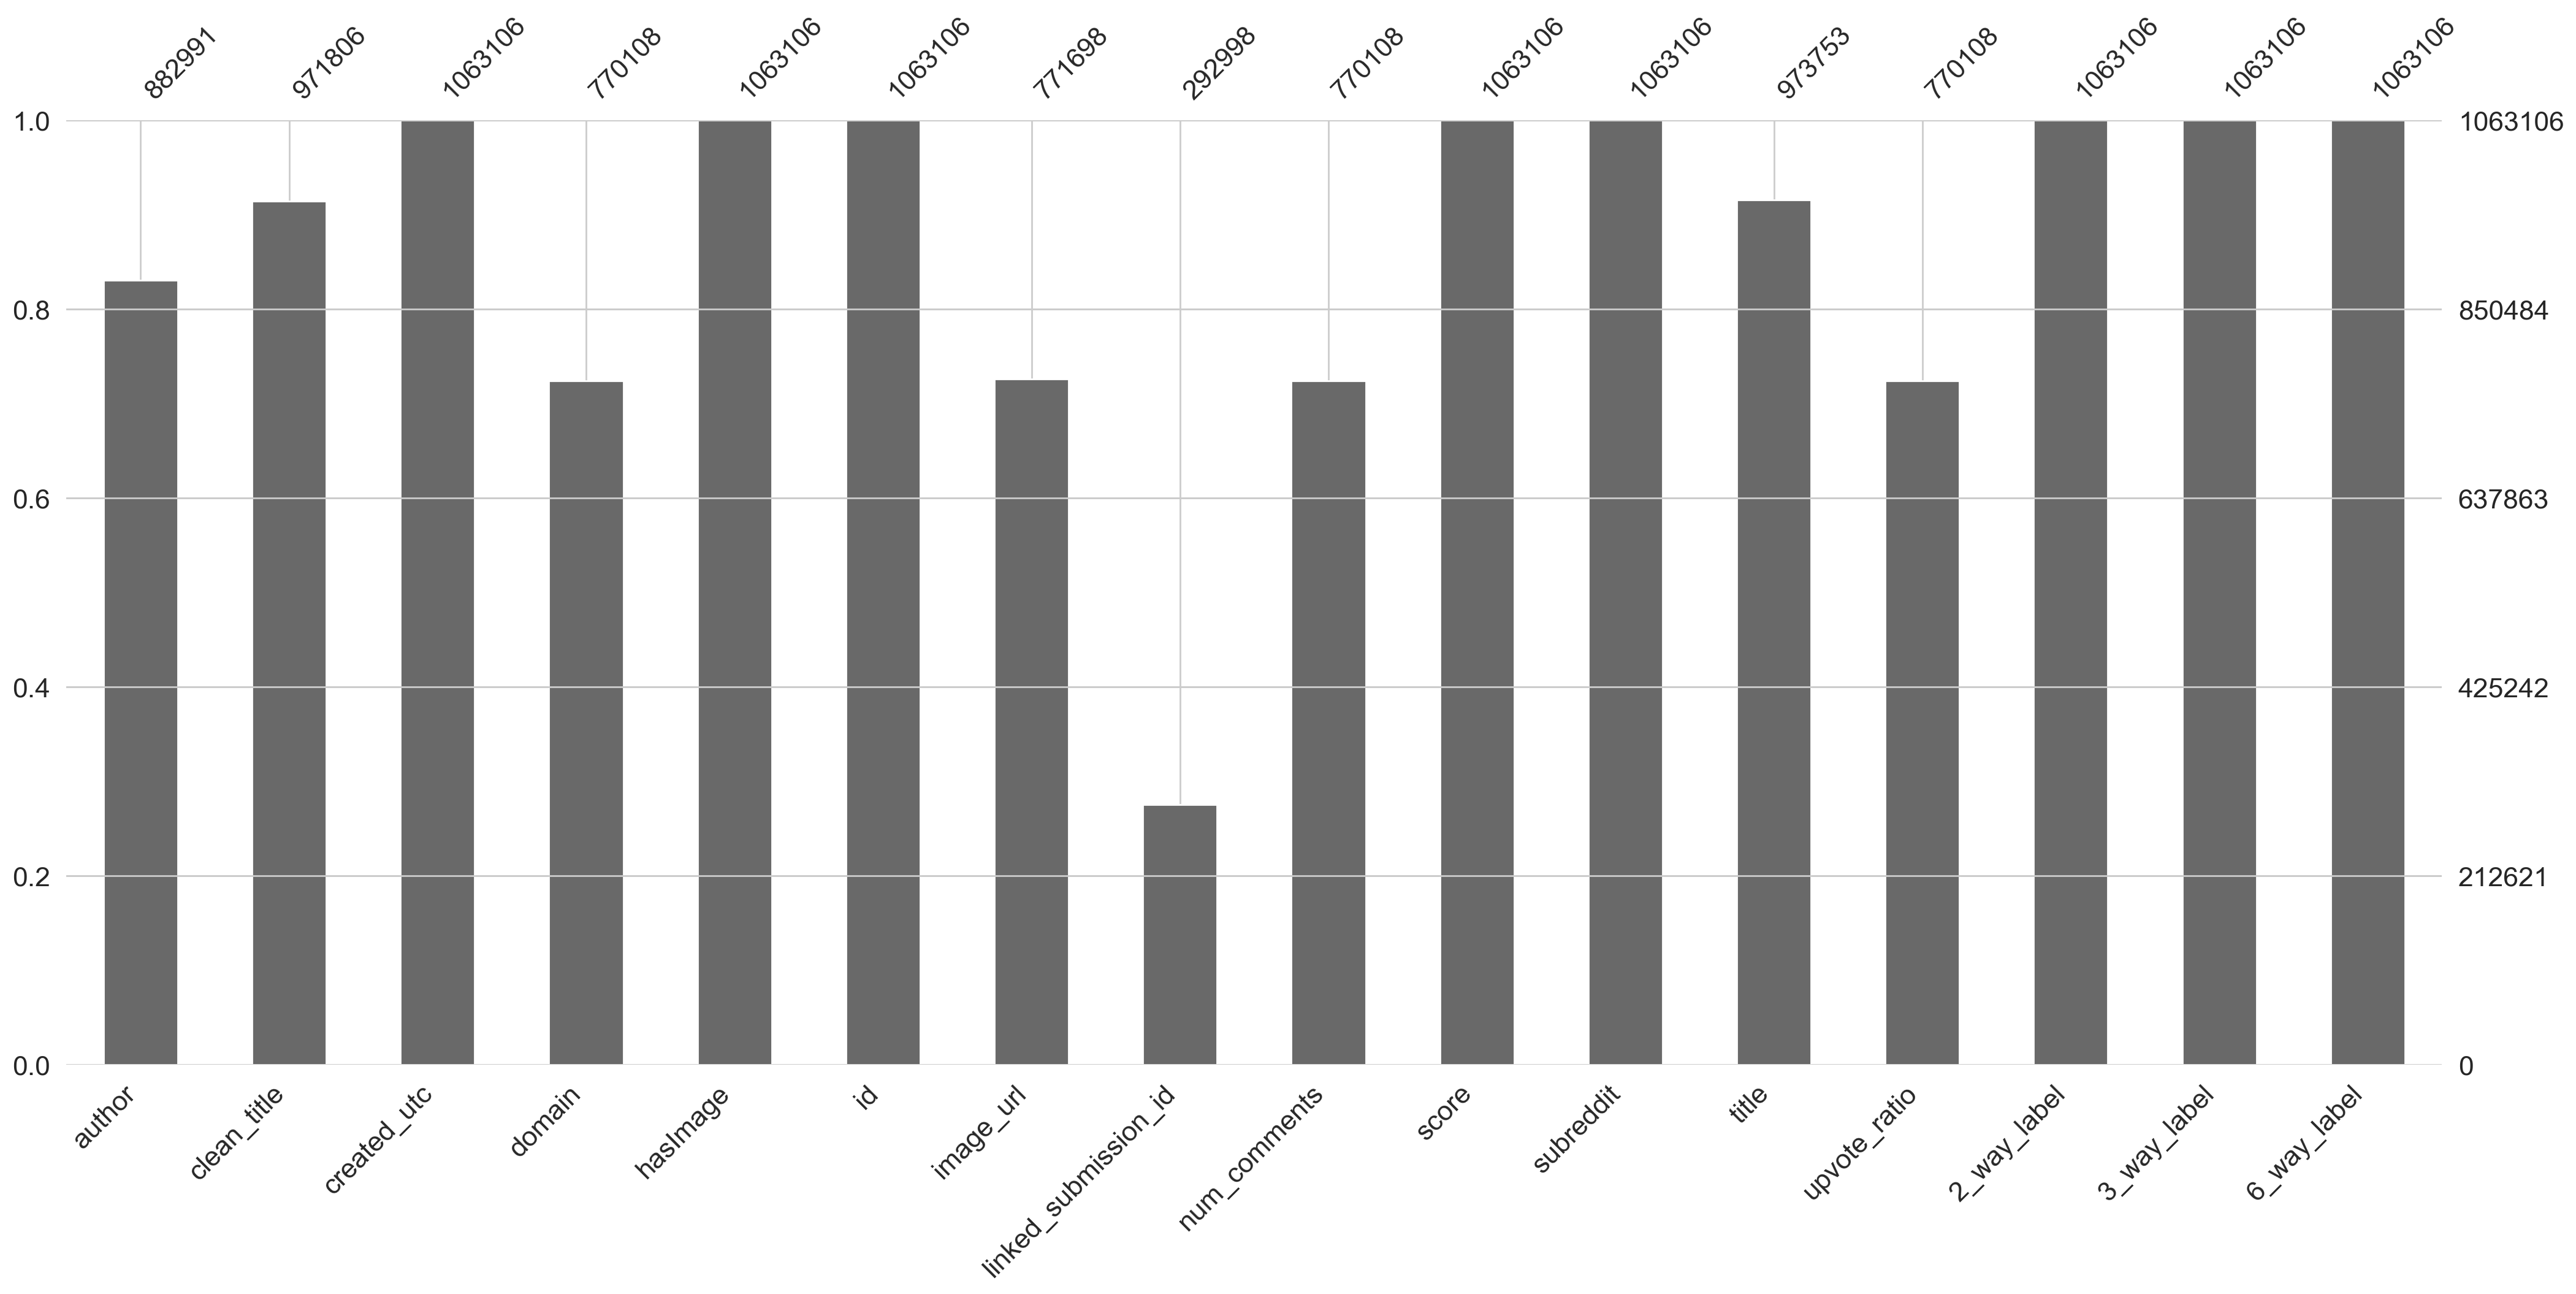

In [34]:
missing_values_analysis(df)

### Duplicates

Are there any duplicates?

In [35]:
df.duplicated().any()

False

#### Counts of occurrences of True and False of column hasImage

In [42]:
counts = df['hasImage'].value_counts( )
print(counts)
counts_dict = df['hasImage'].value_counts( ).to_dict()
print(counts_dict)

hasImage
True     773564
False    289542
Name: count, dtype: int64
{True: 773564, False: 289542}


## Attributes analysis

Analysis of all attributes:

In [36]:
df.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,buzzly6,virginia first lady criticized for handing cot...,1.551316e+09,philly.com,False,avkxum,NaN,NaN,2.0,16,nottheonion,Virginia first lady criticized for handing cot...,0.69,1,0,0
1,NaN,jason falconer reluctant hero stopped mall att...,1.474326e+09,cnn.it,False,53kdz3,NaN,NaN,0.0,7,upliftingnews,Jason Falconer: Reluctant hero stopped mall at...,0.77,1,0,0
2,myternity,NaN,1.497067e+09,NaN,True,diperbi,http://i.imgur.com/cSIuEVF.jpg,6gc83w,NaN,3,psbattle_artwork,NaN,NaN,0,2,4
3,NaN,woman bites camels testicles to save herself a...,1.569178e+09,wbrz.com,False,d7upss,NaN,NaN,3.0,7,nottheonion,Woman bites camel’s testicles to save herself ...,1.00,1,0,0
4,trustbytrust,stargazer,1.425139e+09,NaN,True,cozywbv,http://i.imgur.com/BruWKDi.jpg,2xct9d,NaN,3,psbattle_artwork,stargazer,NaN,0,2,4


In [37]:
skip_attributes = [
    'id', 'linked_submission_id', 'image_url', 'created_utc', '3_way_label', '6_way_label'
] # attributes to skip in analysis (e.g. id)

textual_attributes = [
    'clean_title', 'title'
] # attributes with text values (e.g. content of article)
textual_attributes = list(filter(lambda value: value not in skip_attributes, textual_attributes))

numerical_attributes = list(df.select_dtypes([np.number]).columns)
numerical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, numerical_attributes))

categorical_attributes = list(df.select_dtypes(['object', 'category', 'bool']).columns)
categorical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, categorical_attributes))

label_column = '2_way_label' # attribute considered as "label"

### Label attribute distribution

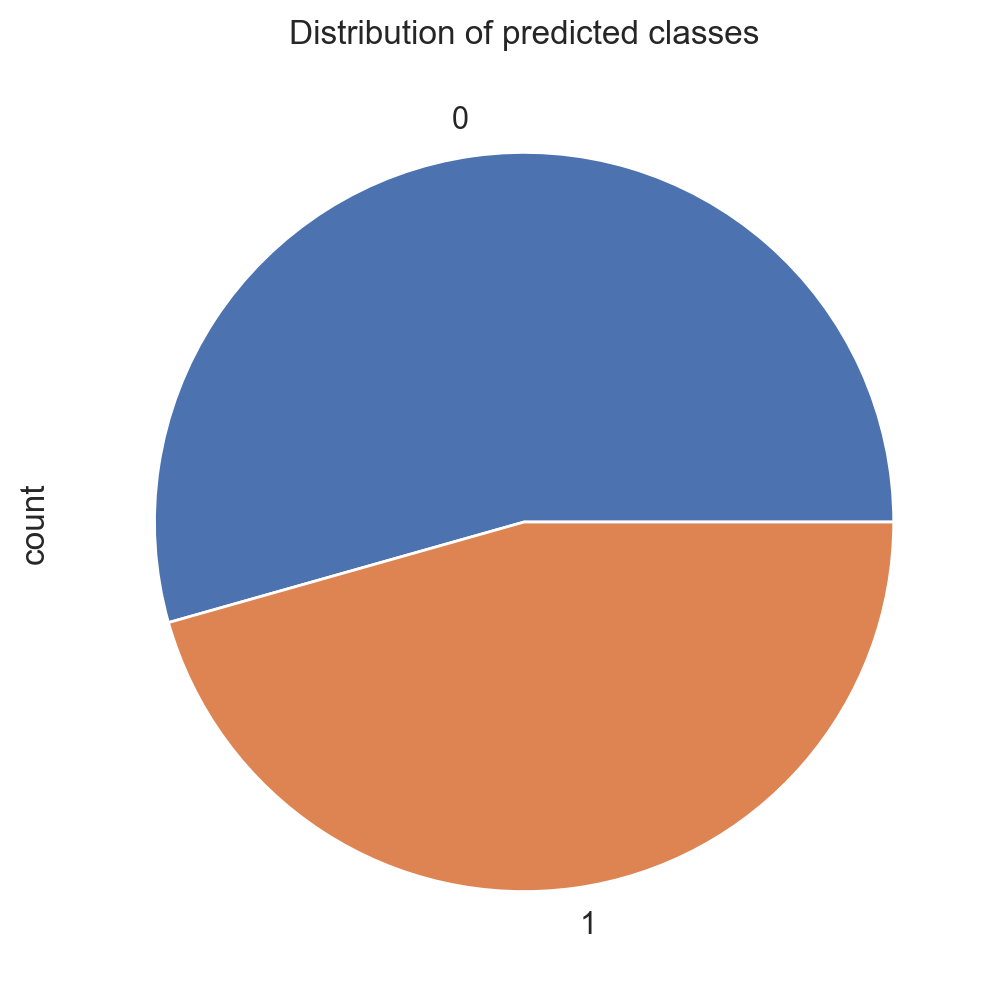

In [66]:
df[label_column].value_counts().plot(kind='pie', title='Distribution of predicted classes');

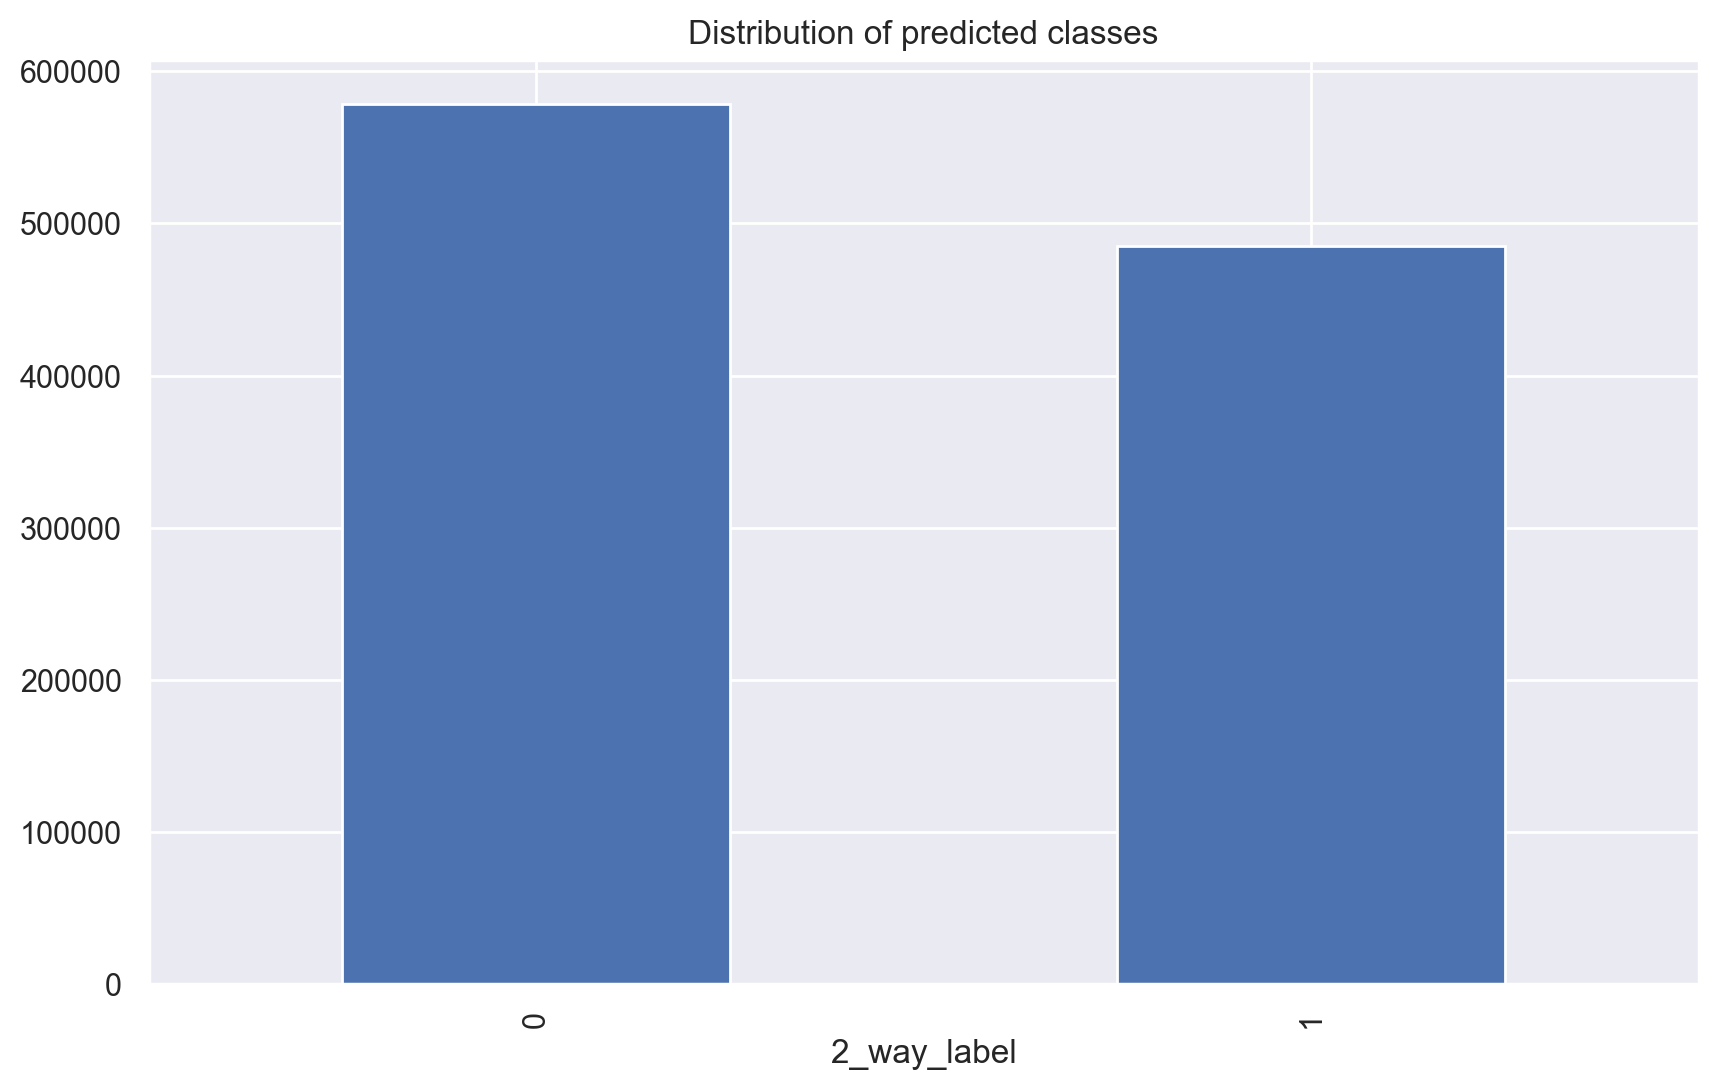

In [67]:
df[label_column].value_counts().plot(kind='bar', title='Distribution of predicted classes');

### Numerical attributes

Analysis of numerical attributes:



Analysis of attribute "num_comments"


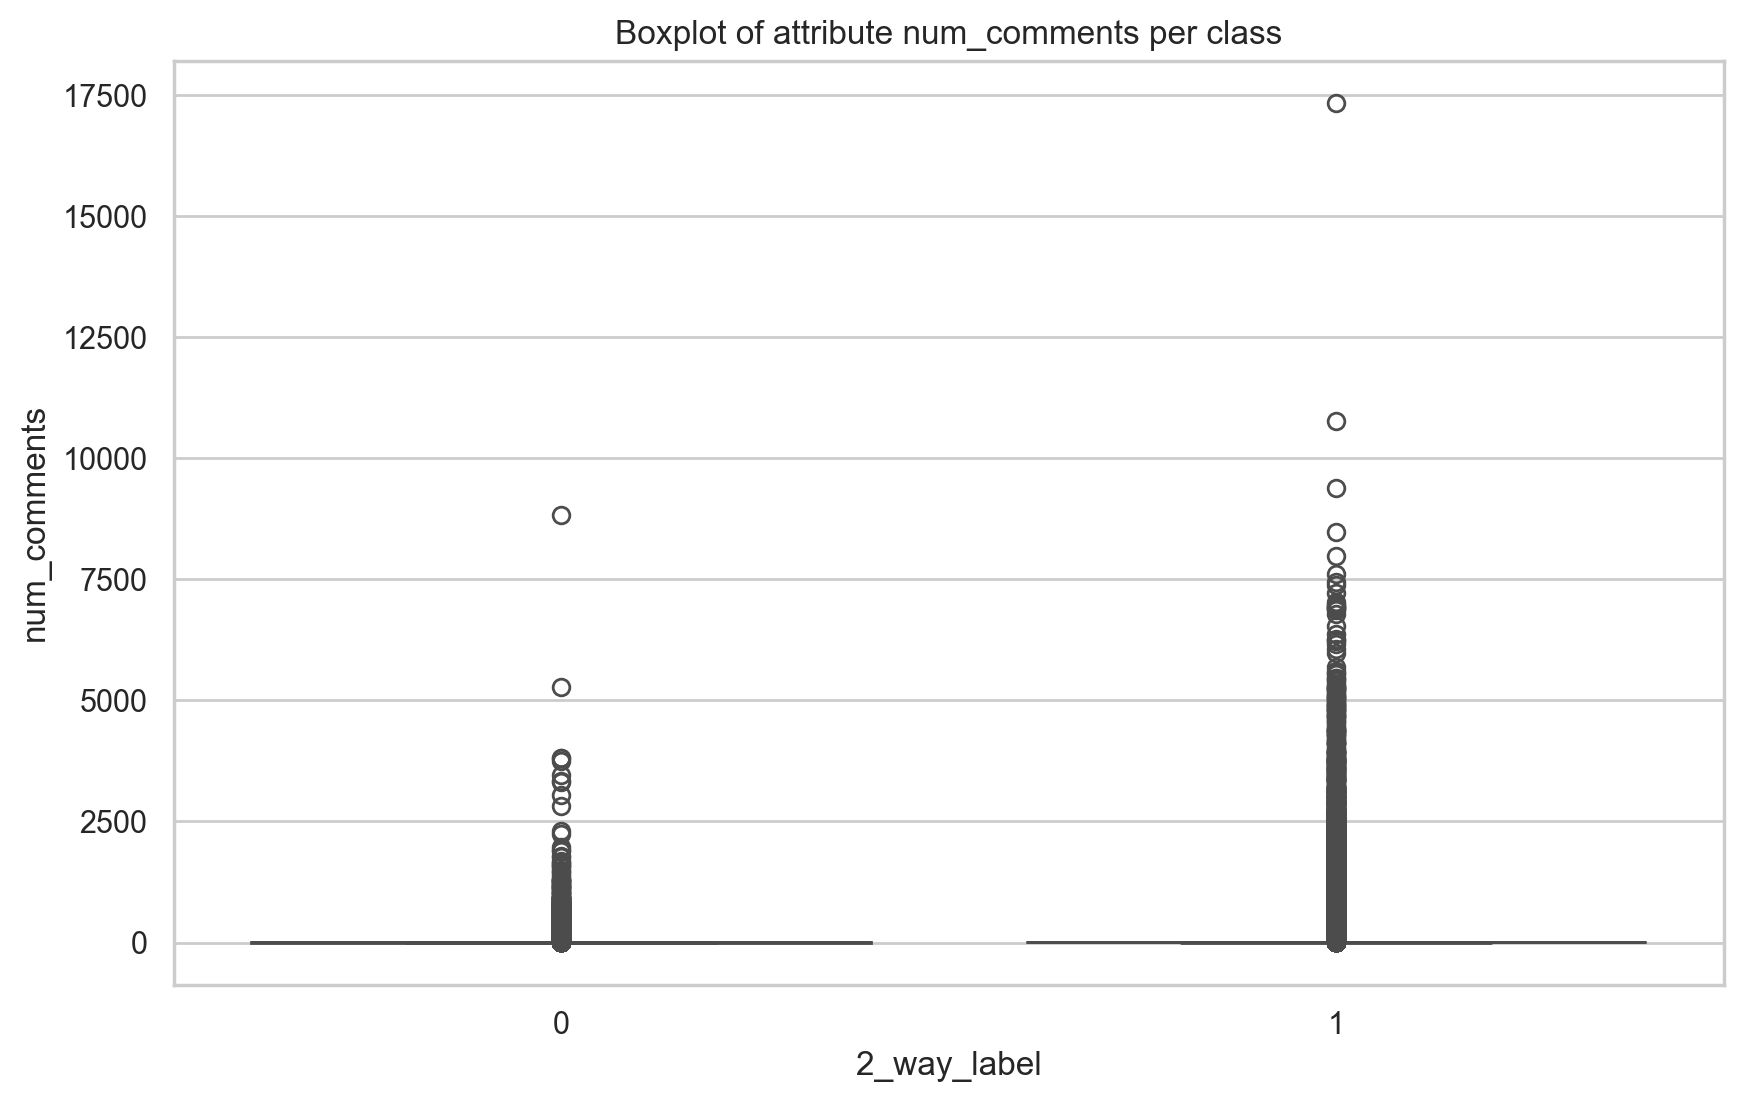

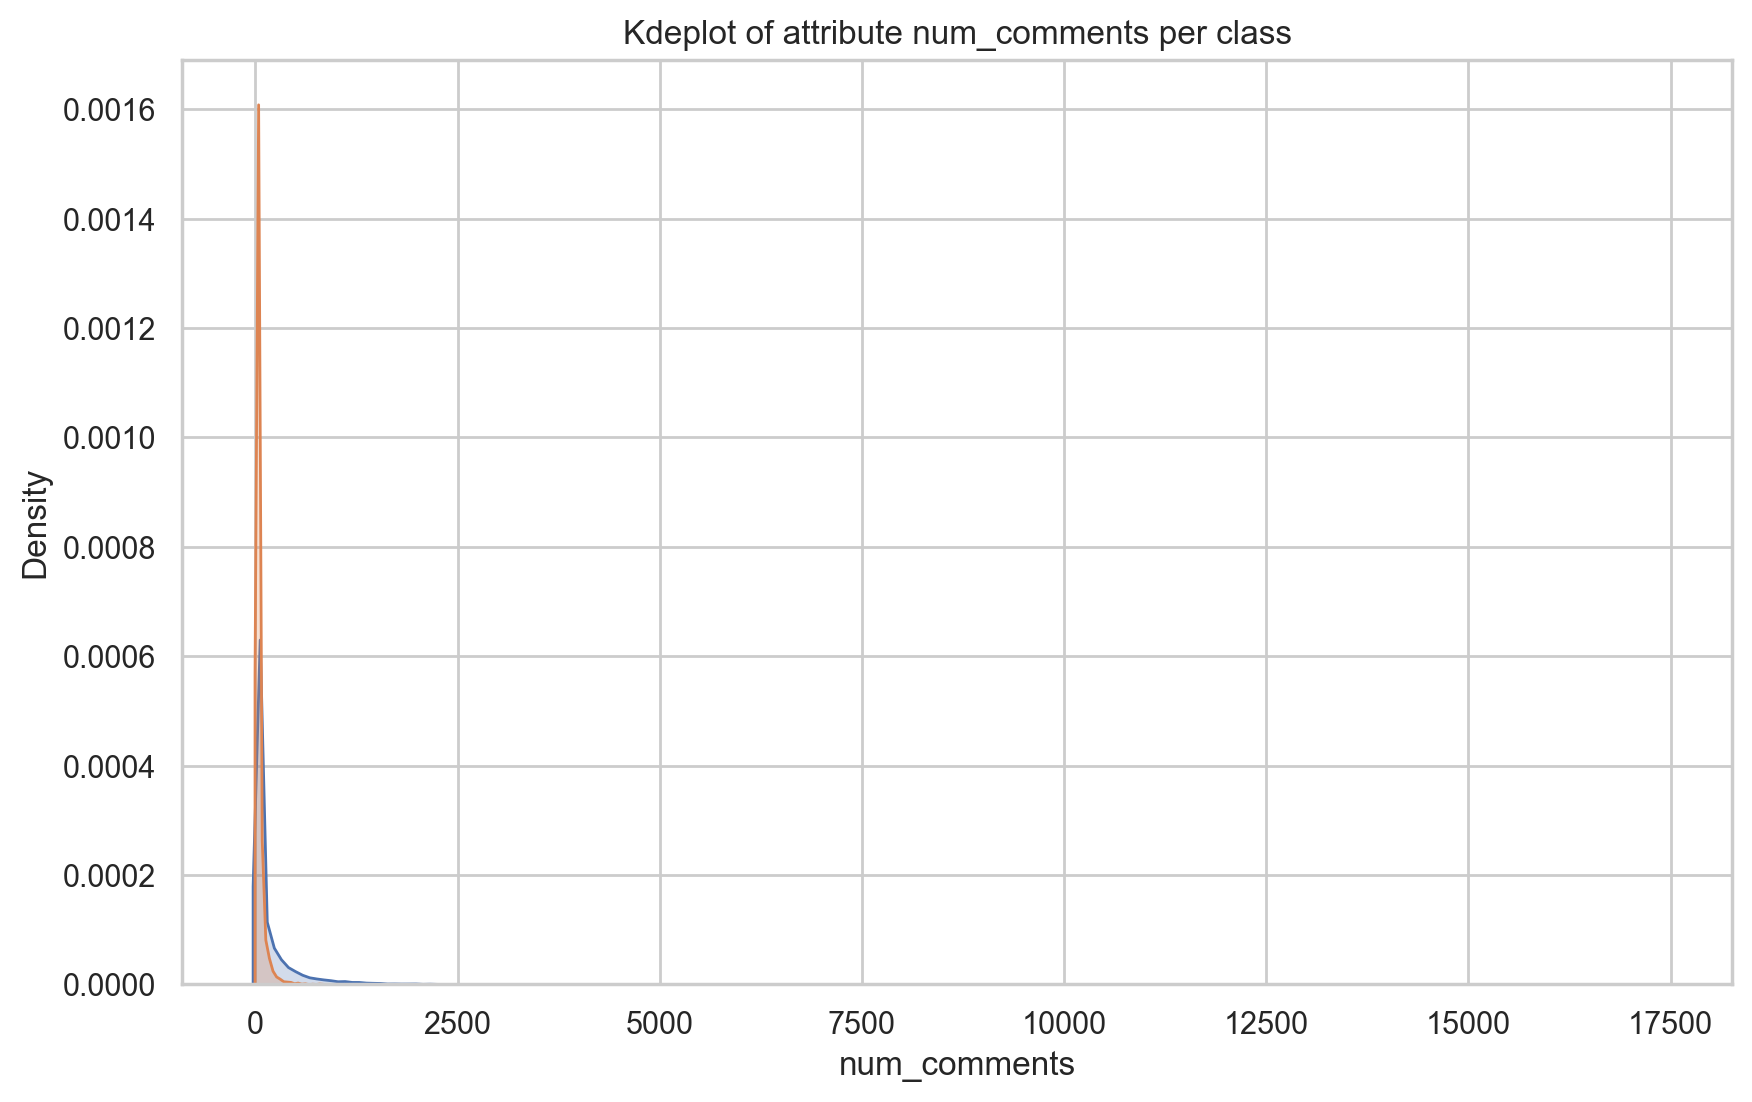



Analysis of attribute "score"


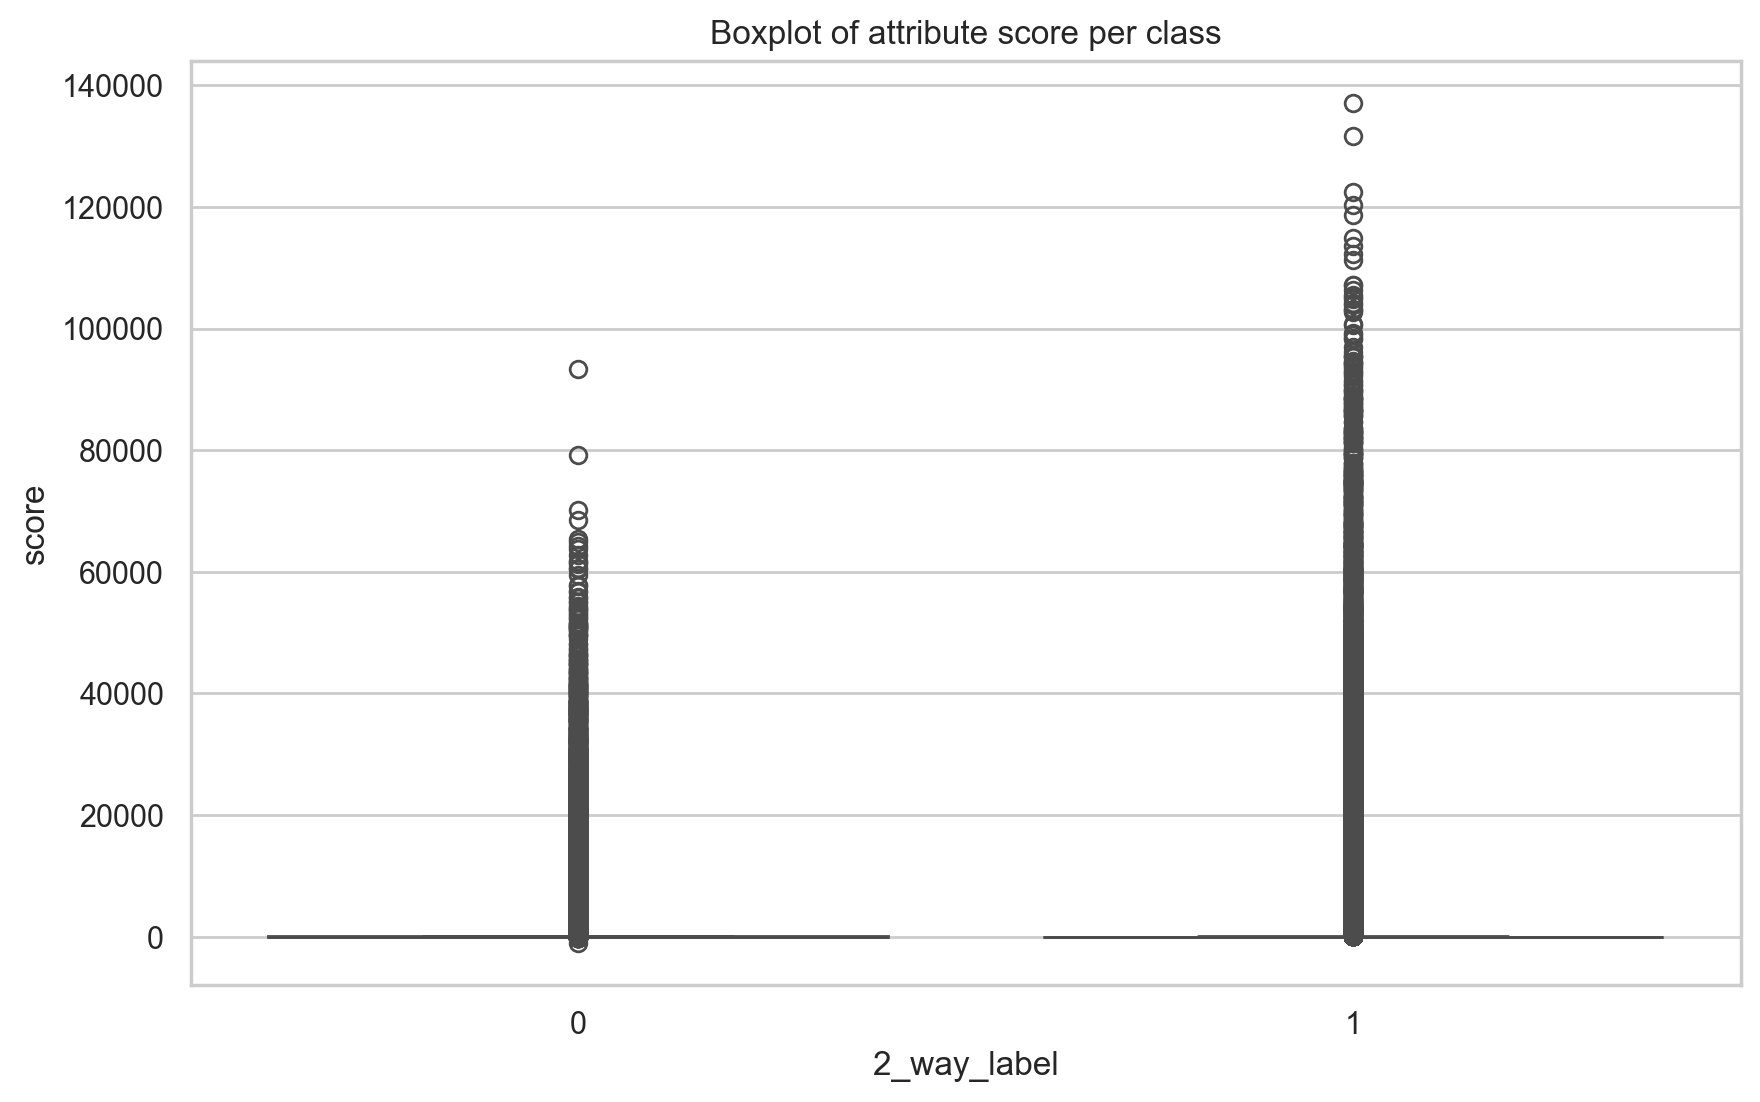

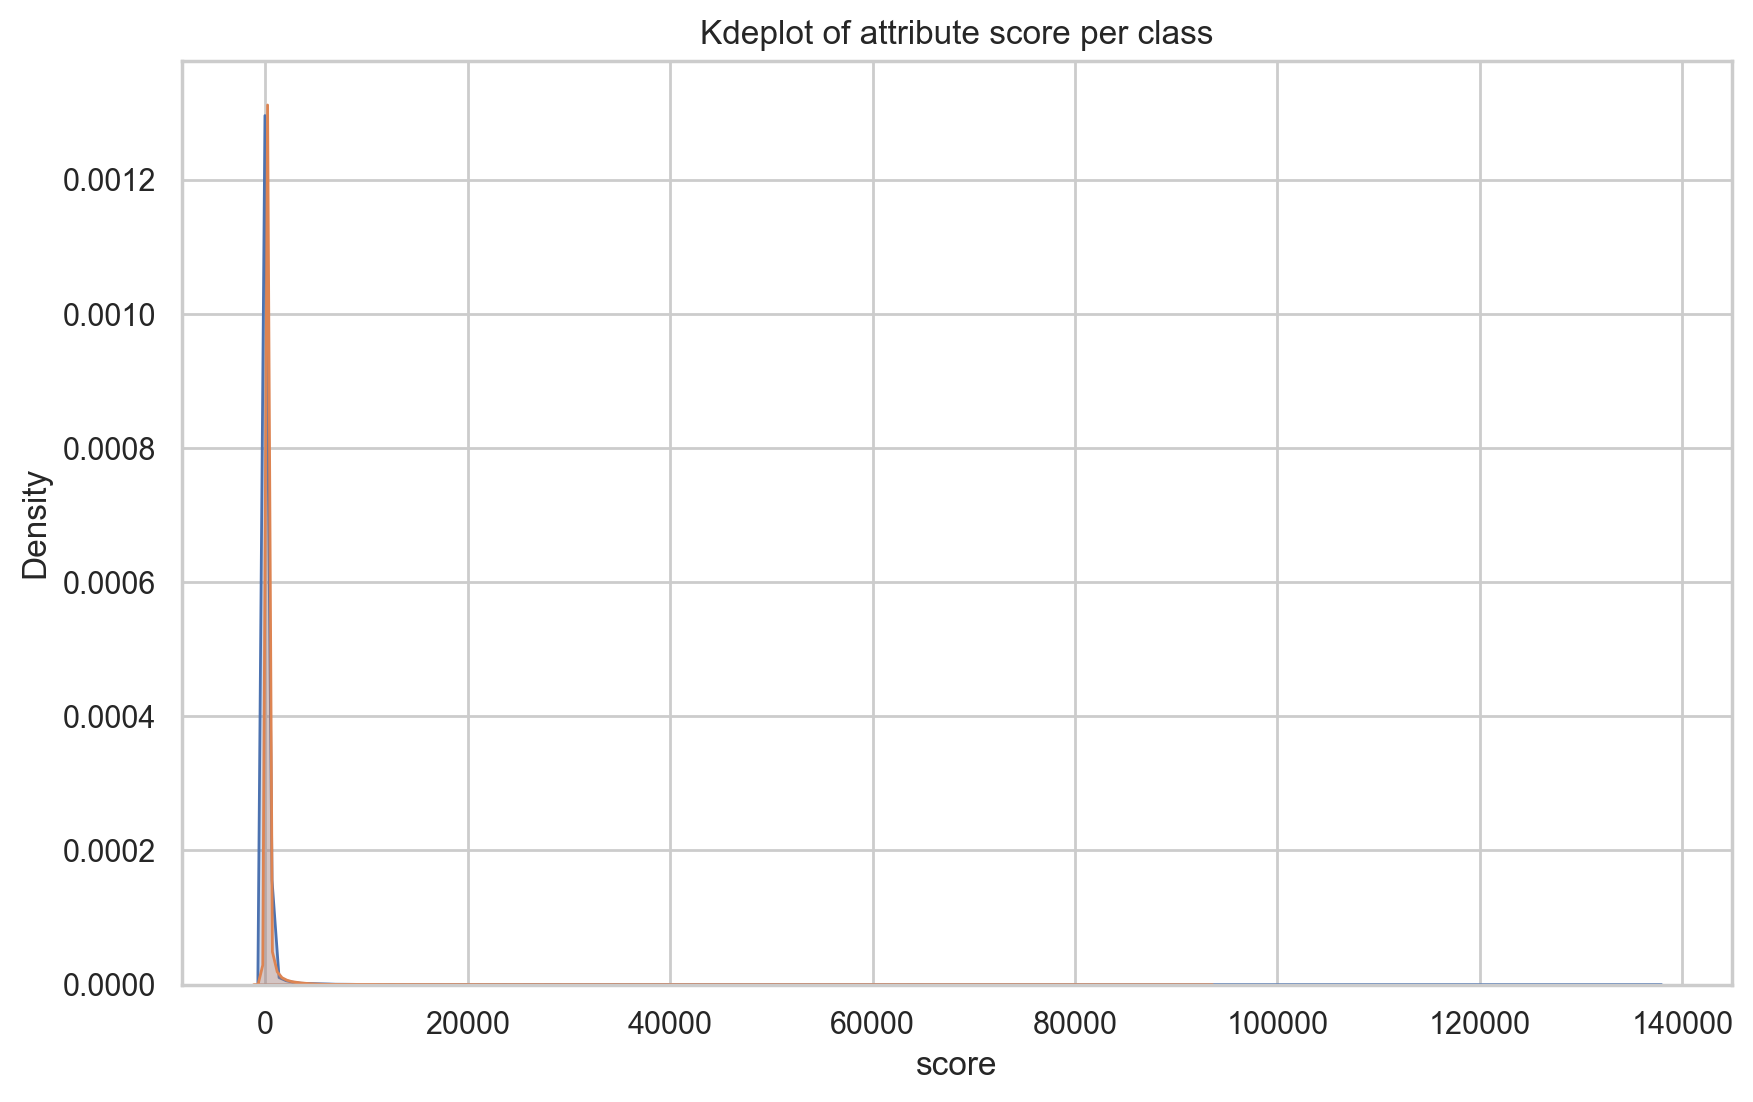



Analysis of attribute "upvote_ratio"


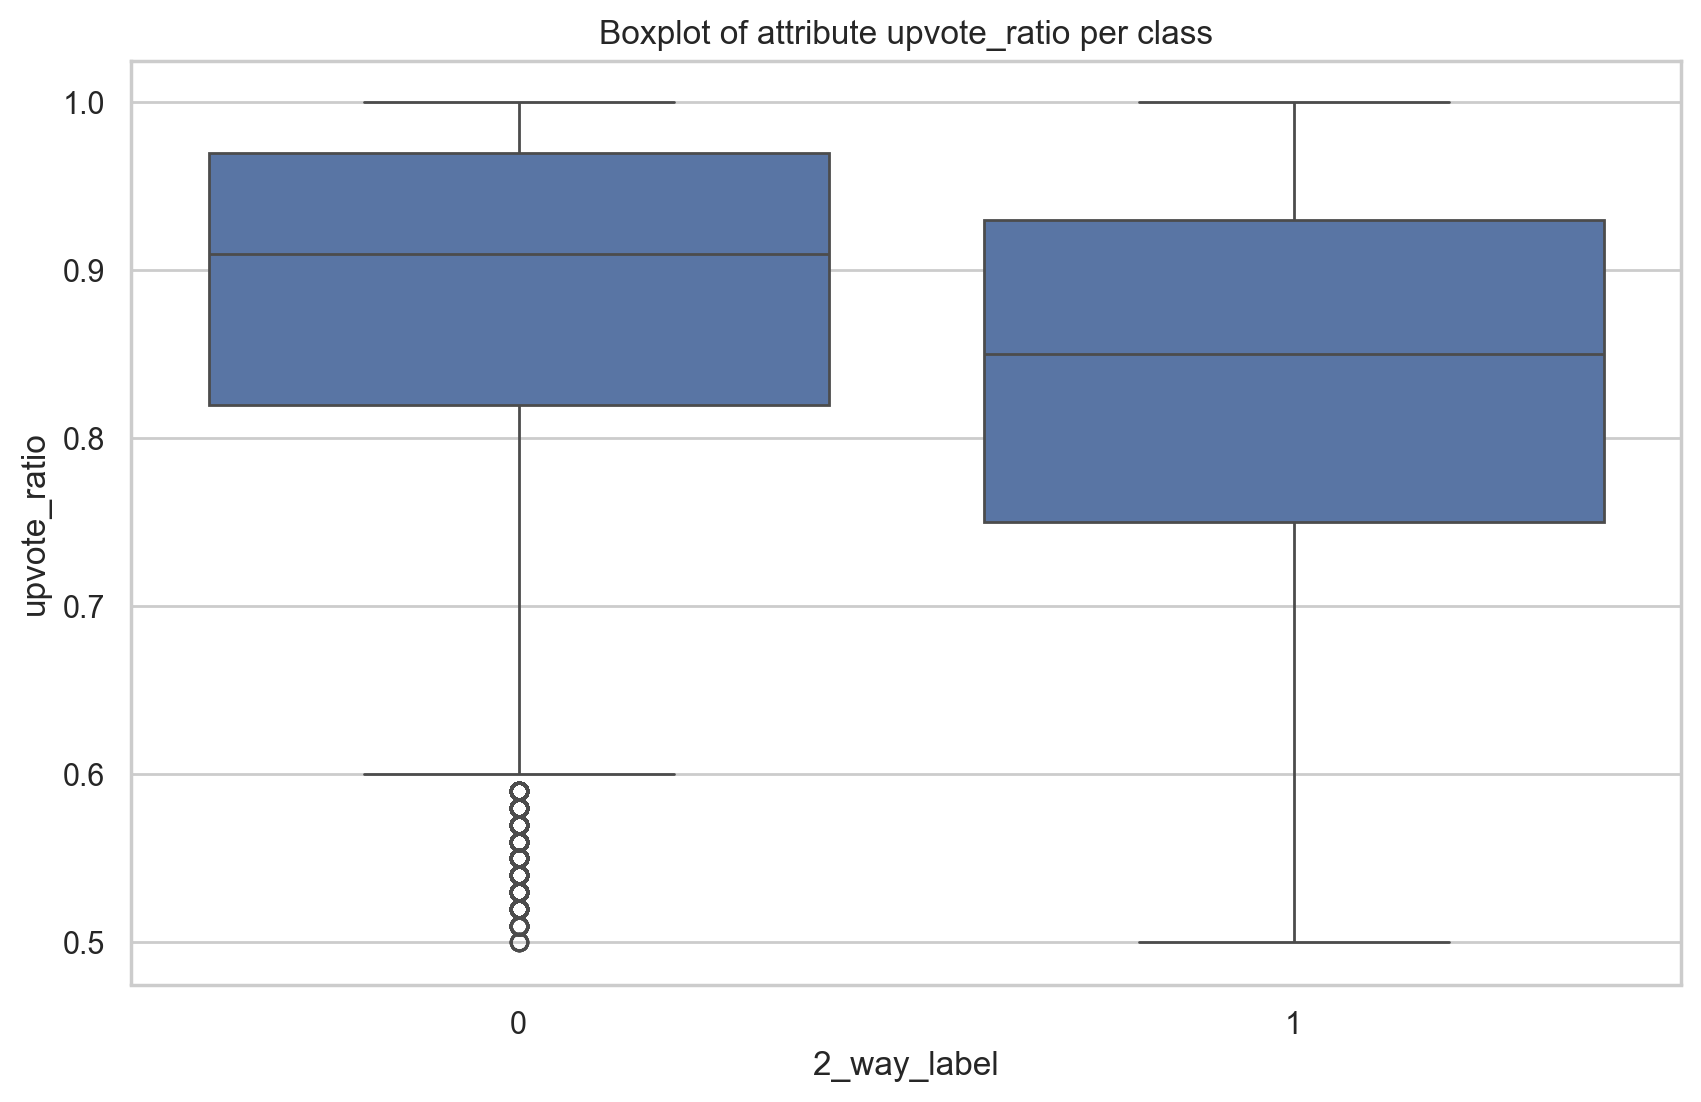

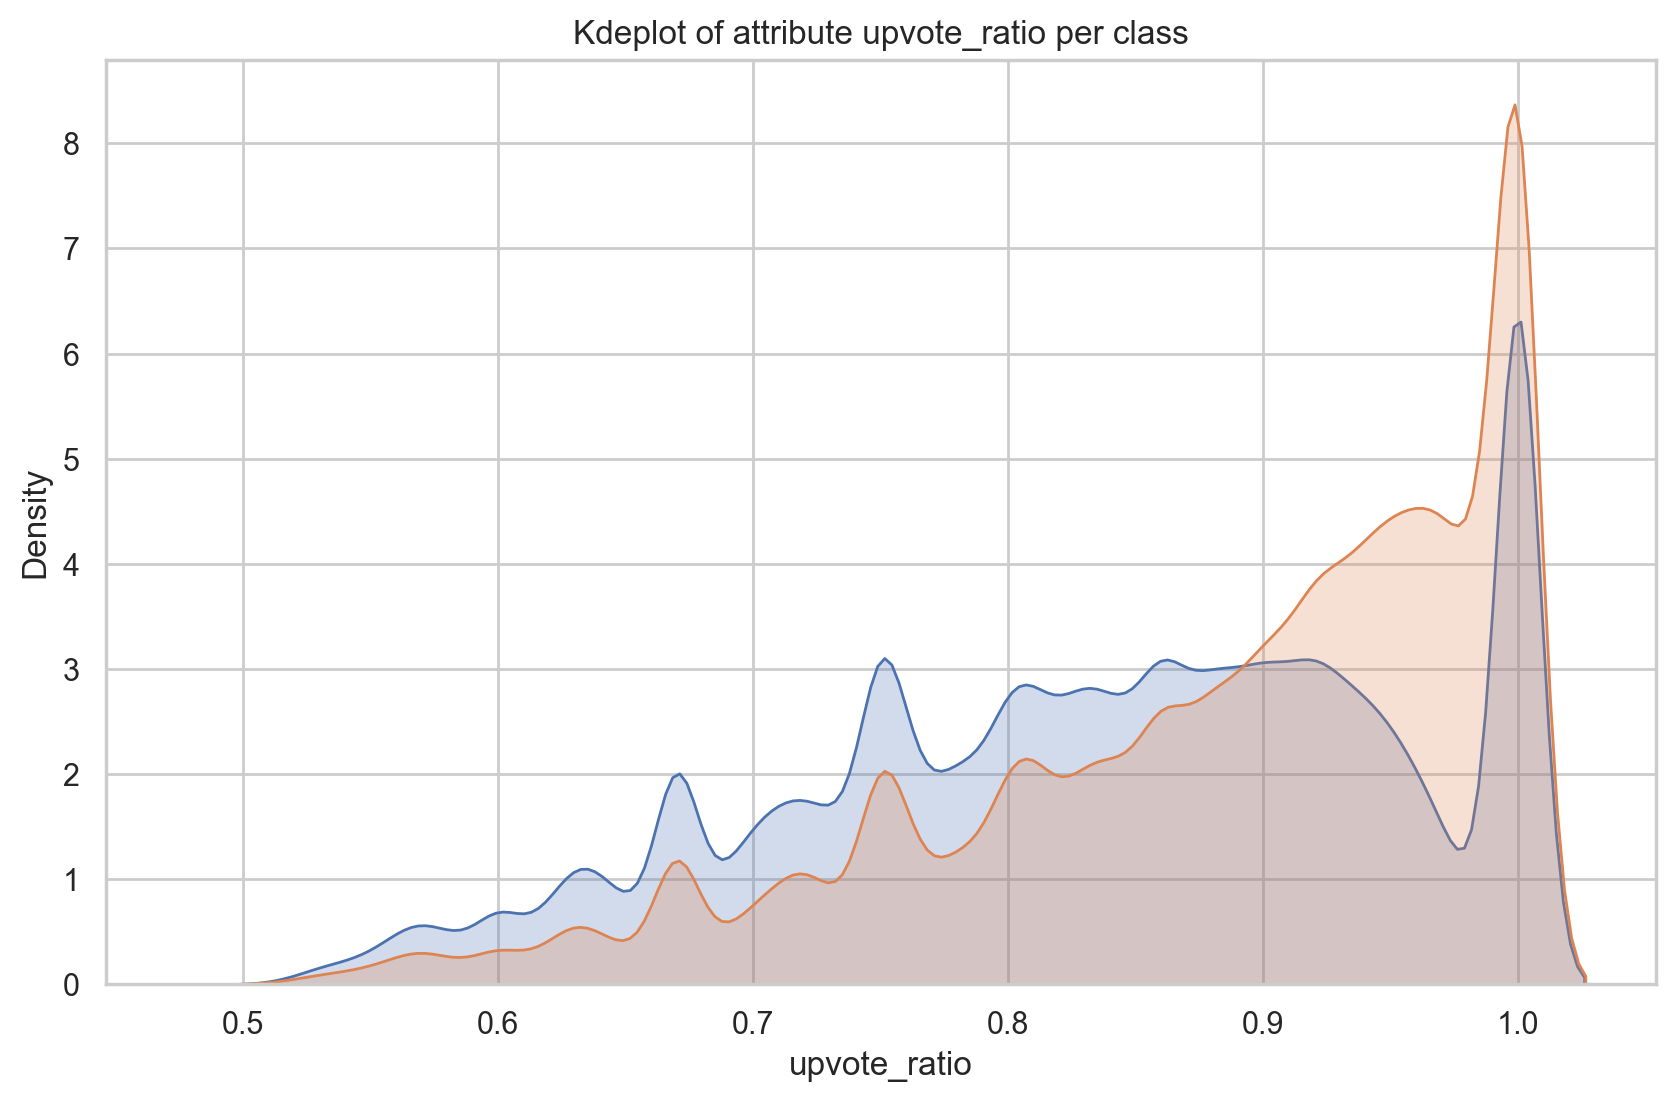

In [43]:
analyse_numerical_attributes(df, label_column, numerical_attributes)

### Categorical attributes

Analysis of categorical attributes:



Analysis of attribute "author"


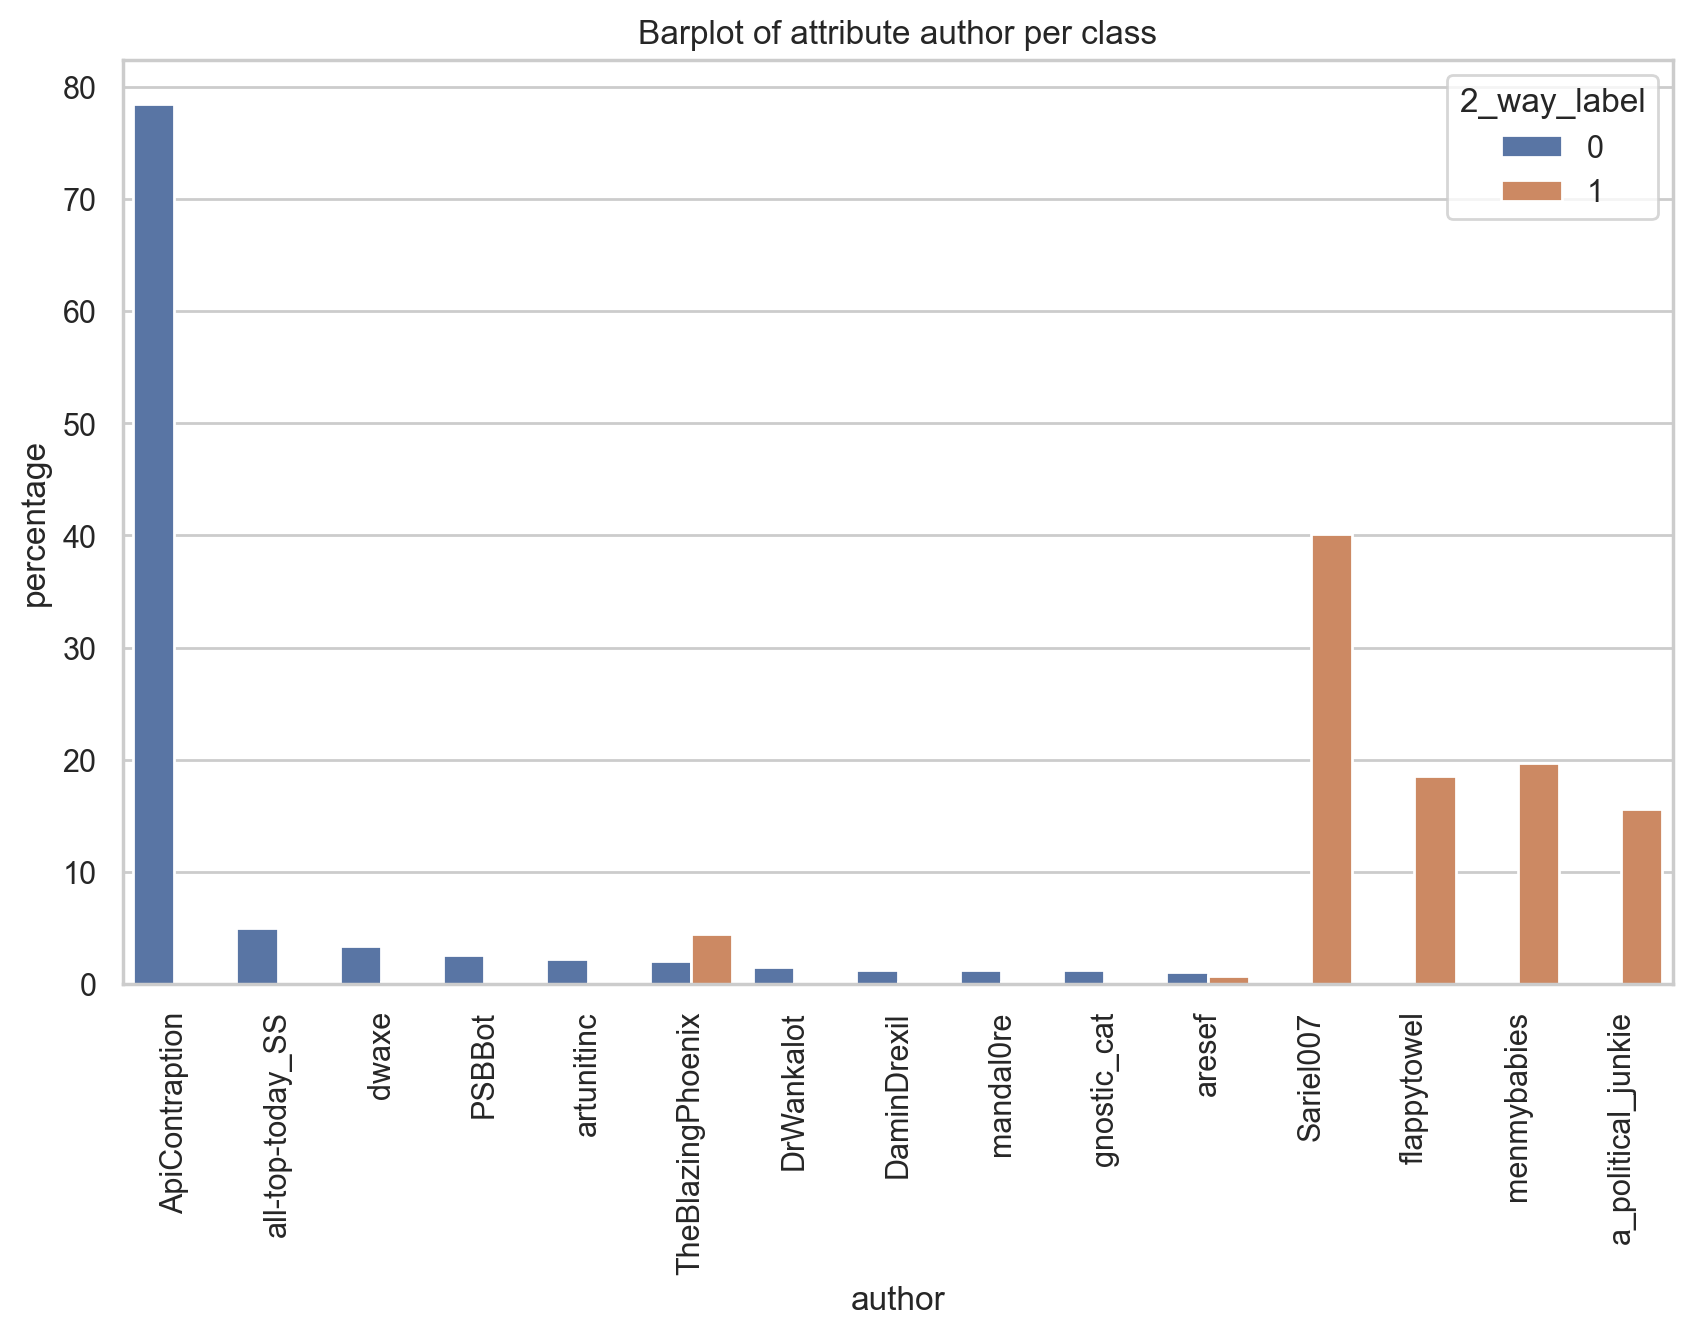



Analysis of attribute "domain"


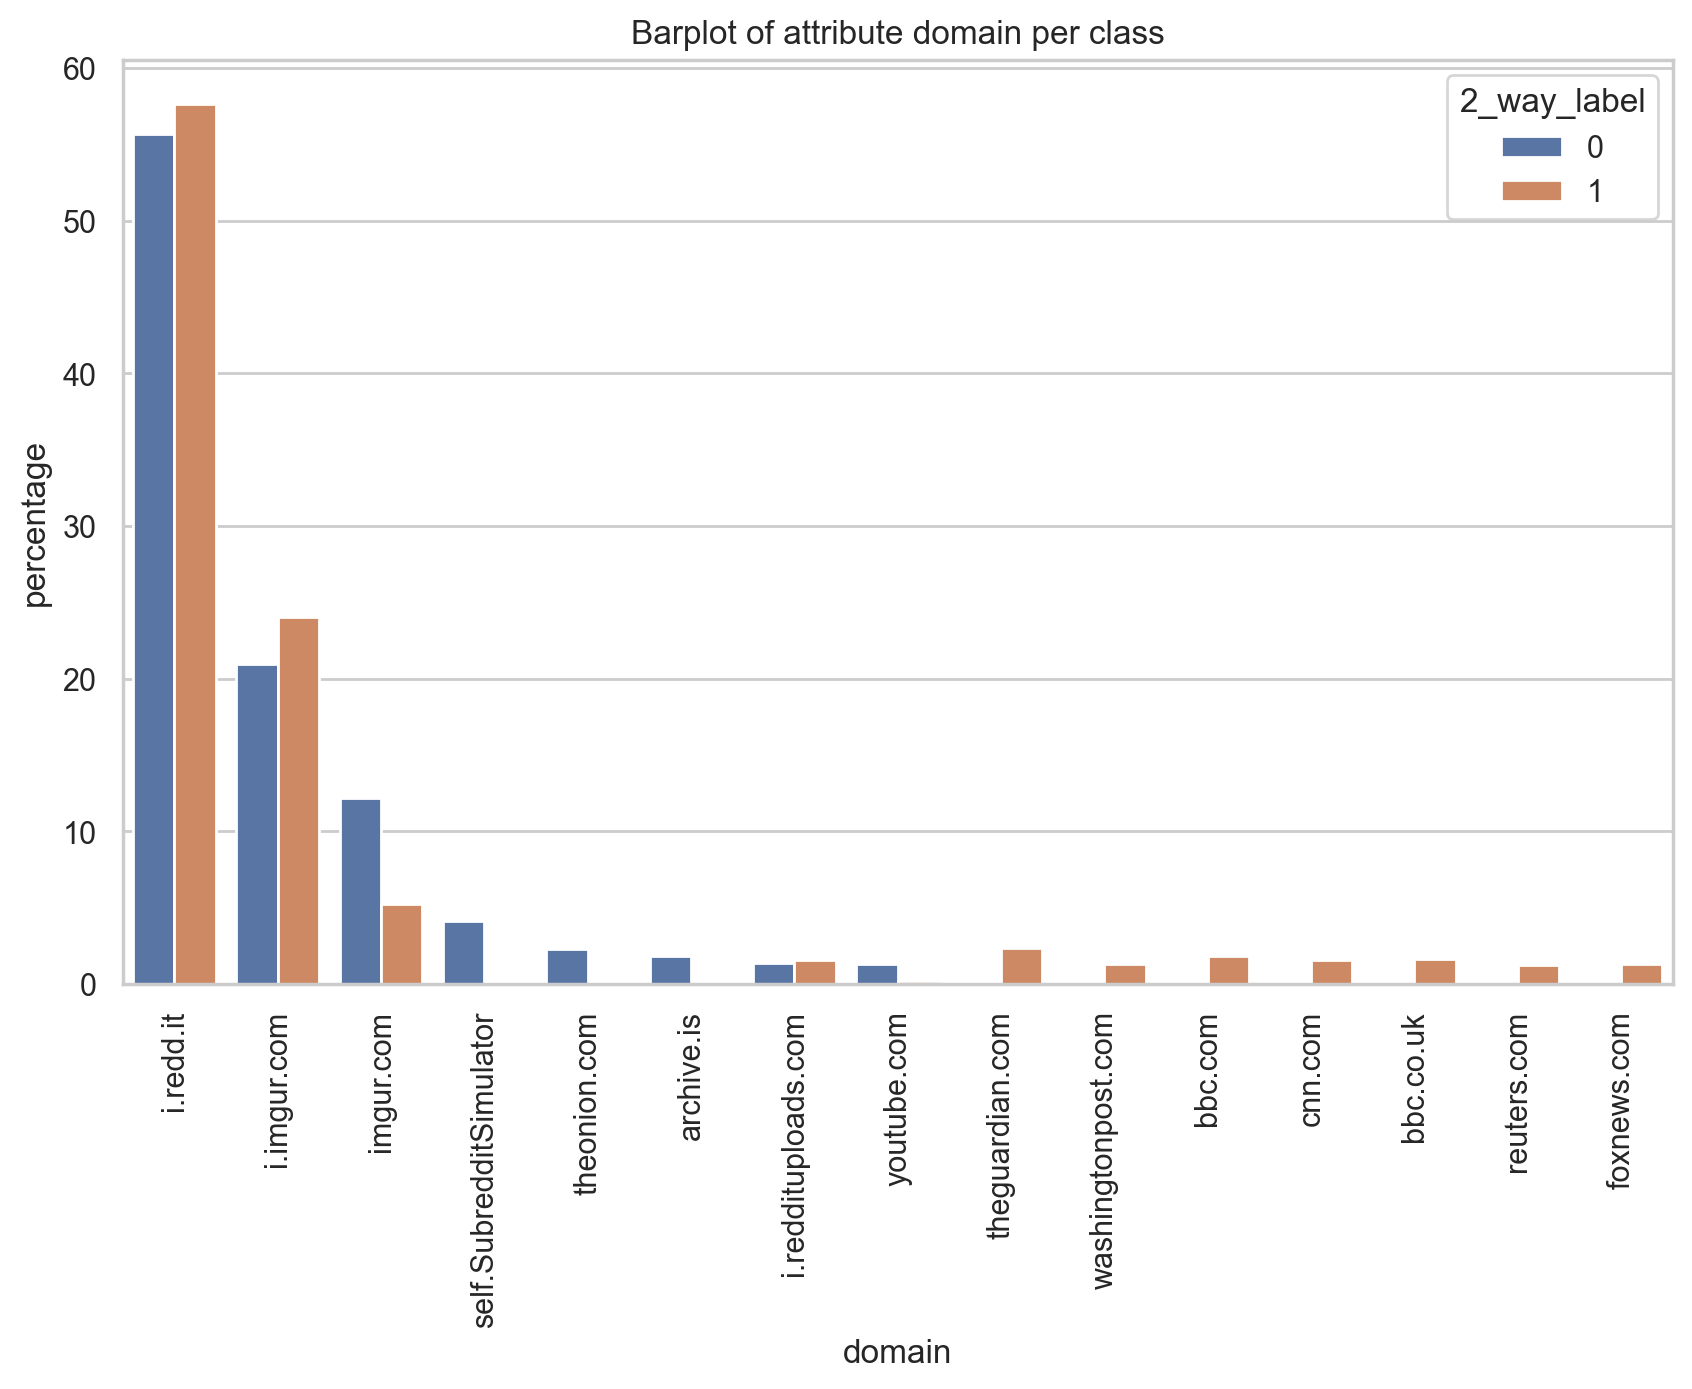



Analysis of attribute "hasImage"


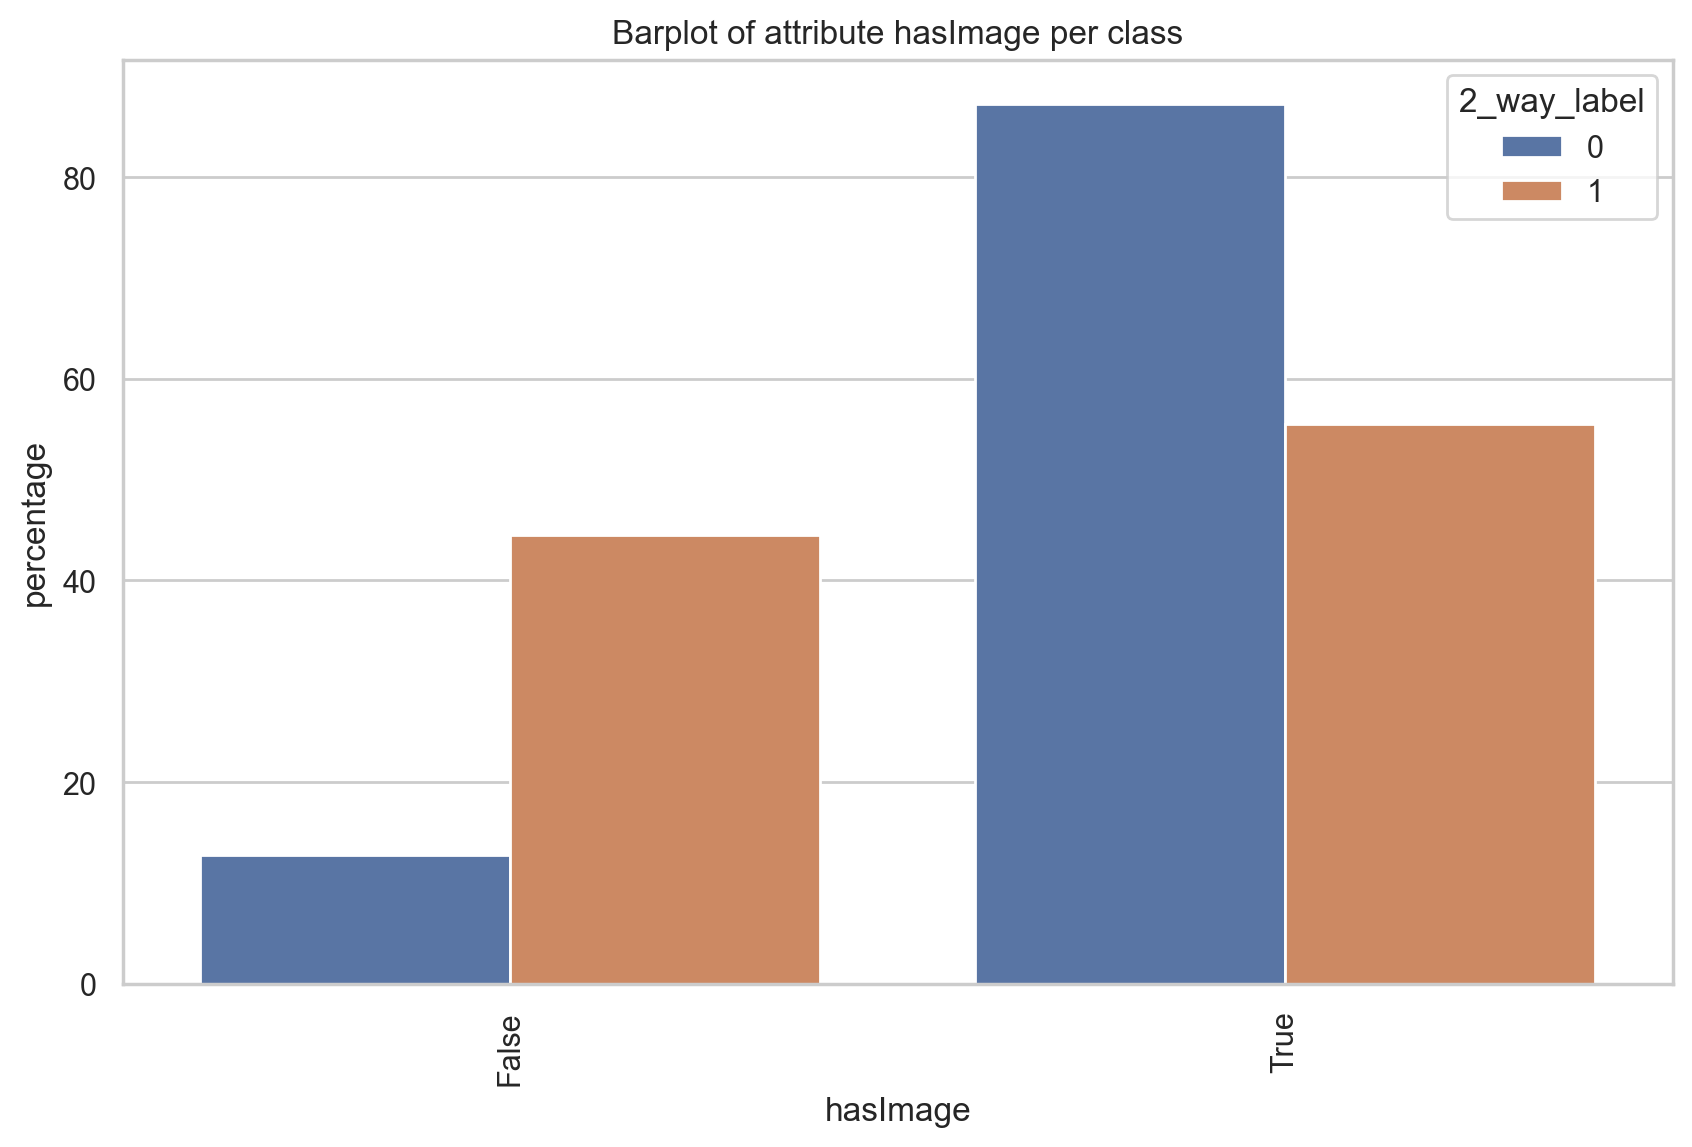



Analysis of attribute "subreddit"


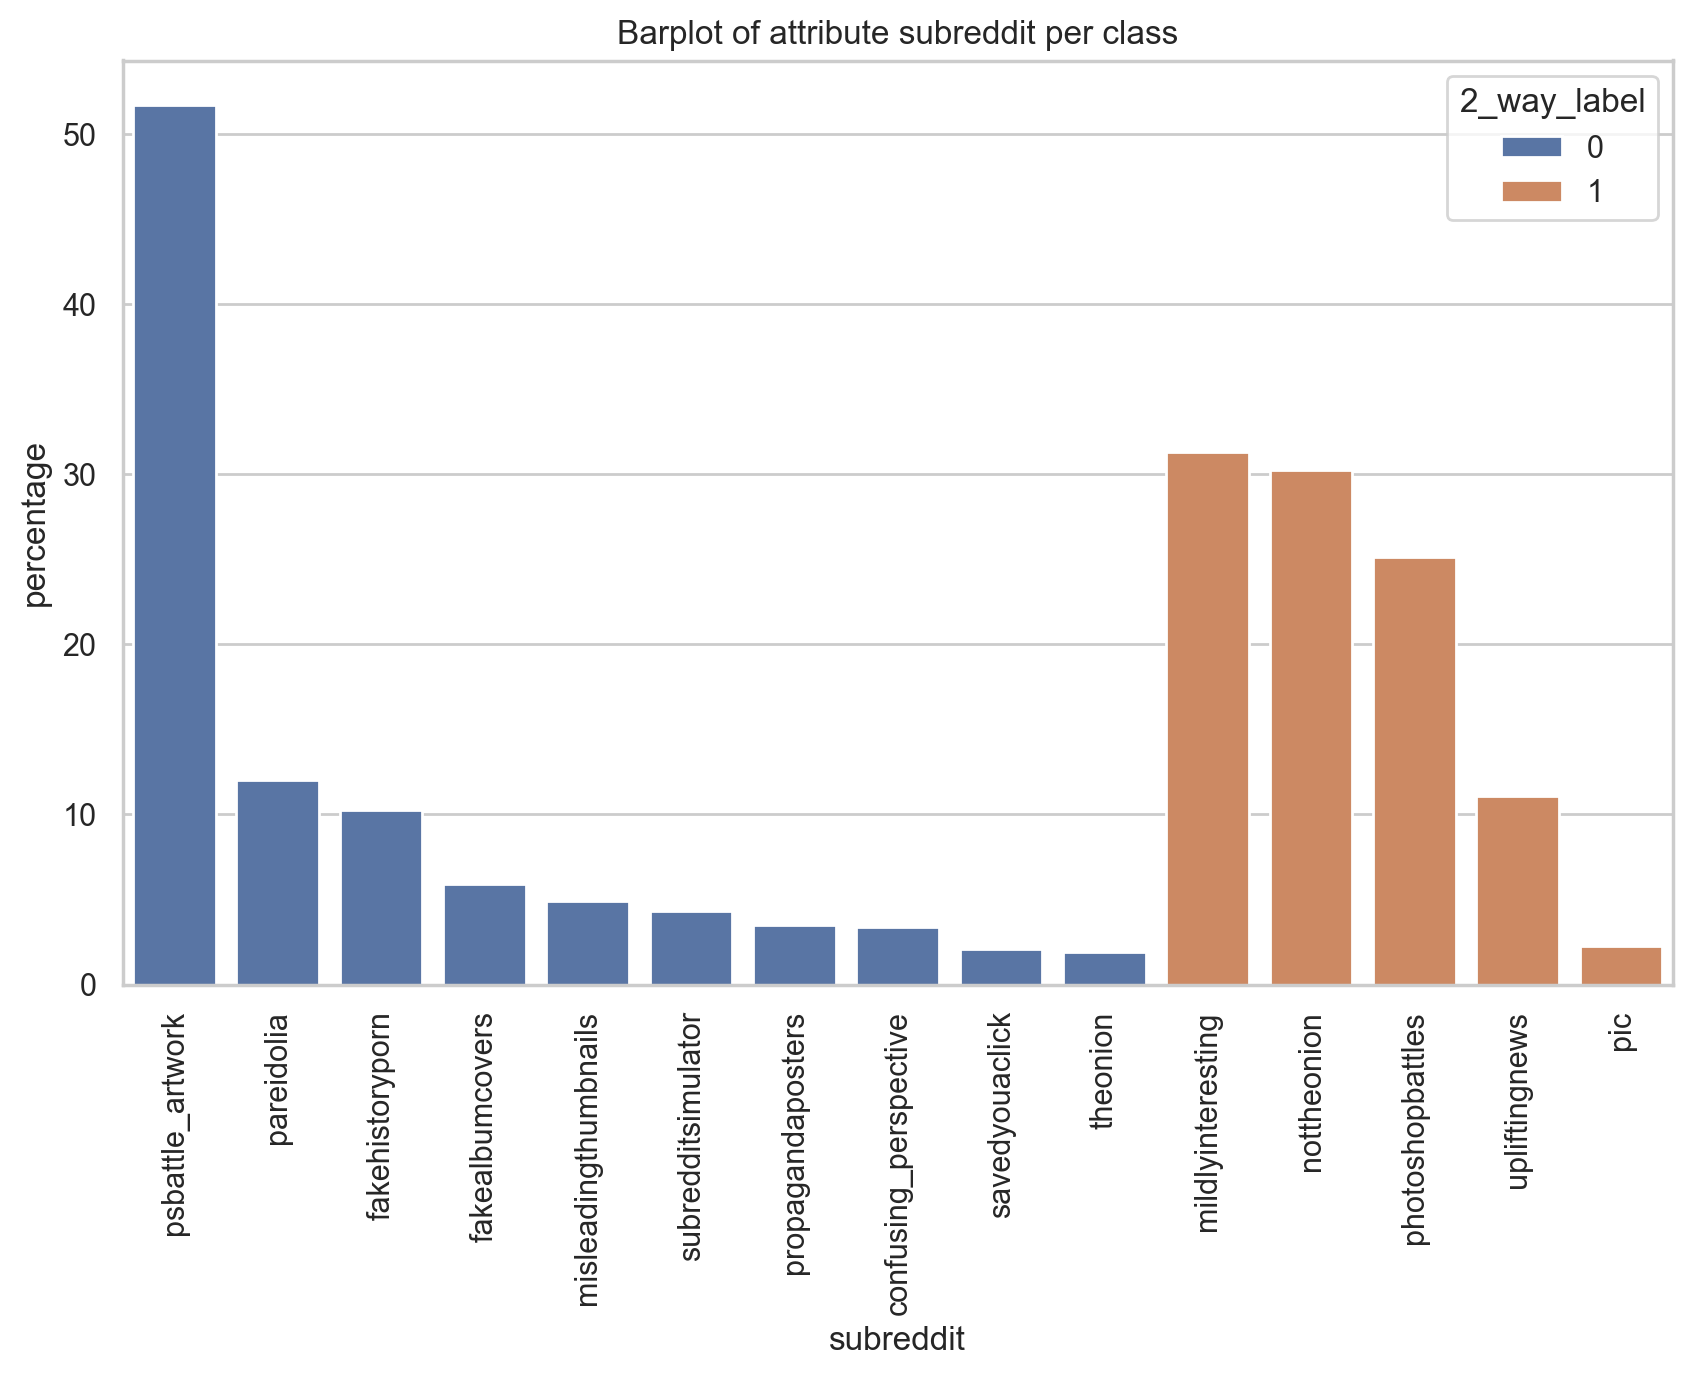

In [44]:
analyse_categorical_attributes(df, label_column, categorical_attributes)

### Textual attributes

Some parts of analysis include preprocessing text. In this case, the following operations are performed:
* removing special characters (only letters are preserved),
* removing tokens shorter than 3 characters,
* removing tokens that are in english stop-words defined by NLTK library,
* removing accent marks from tokens.

Analysis of textual attributes:



Analysis of attribute "clean_title"


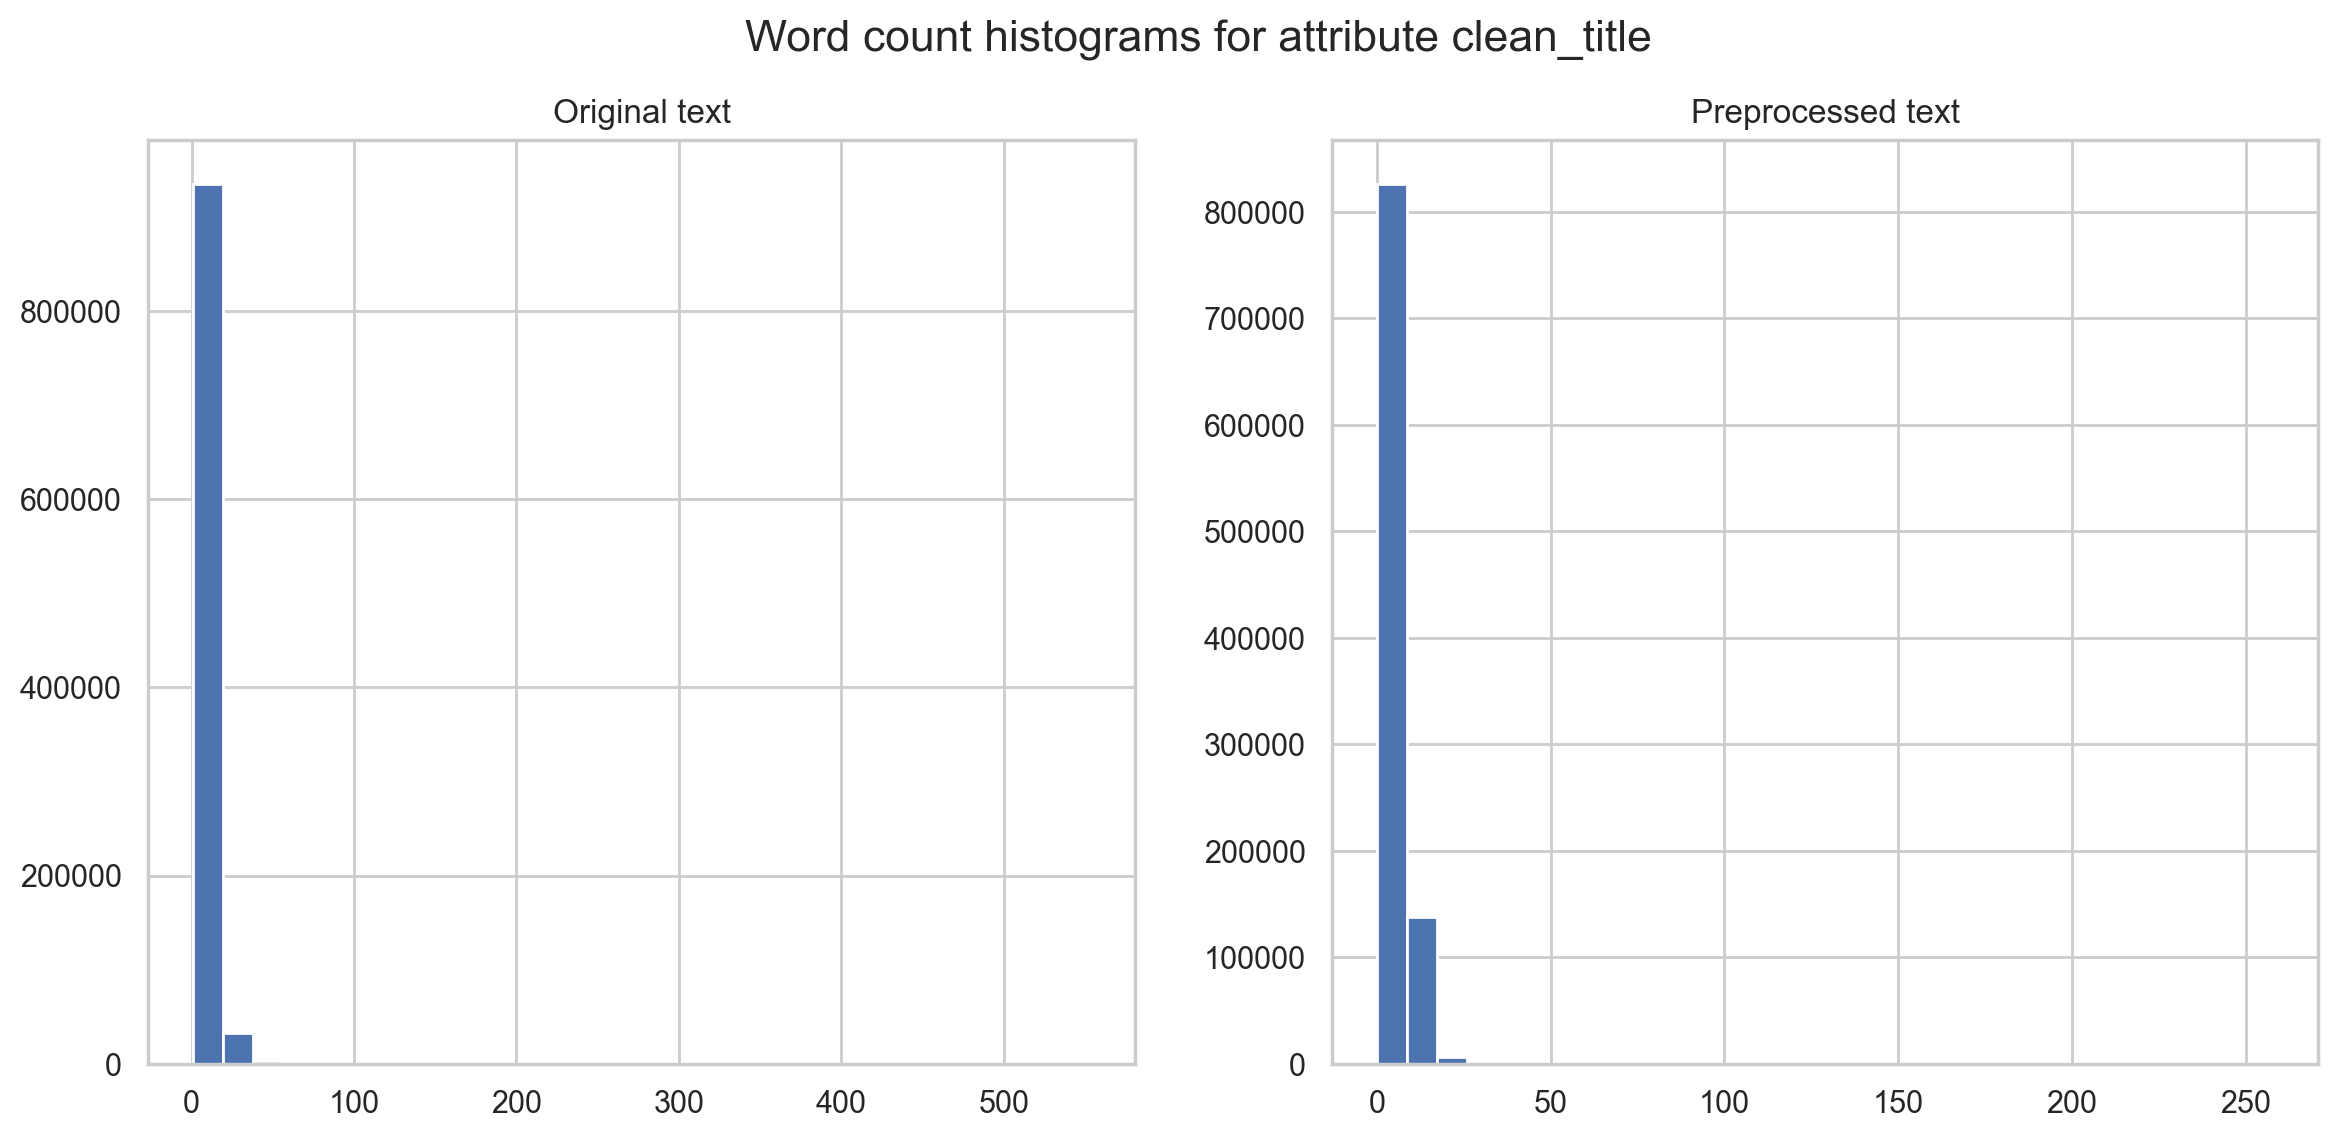

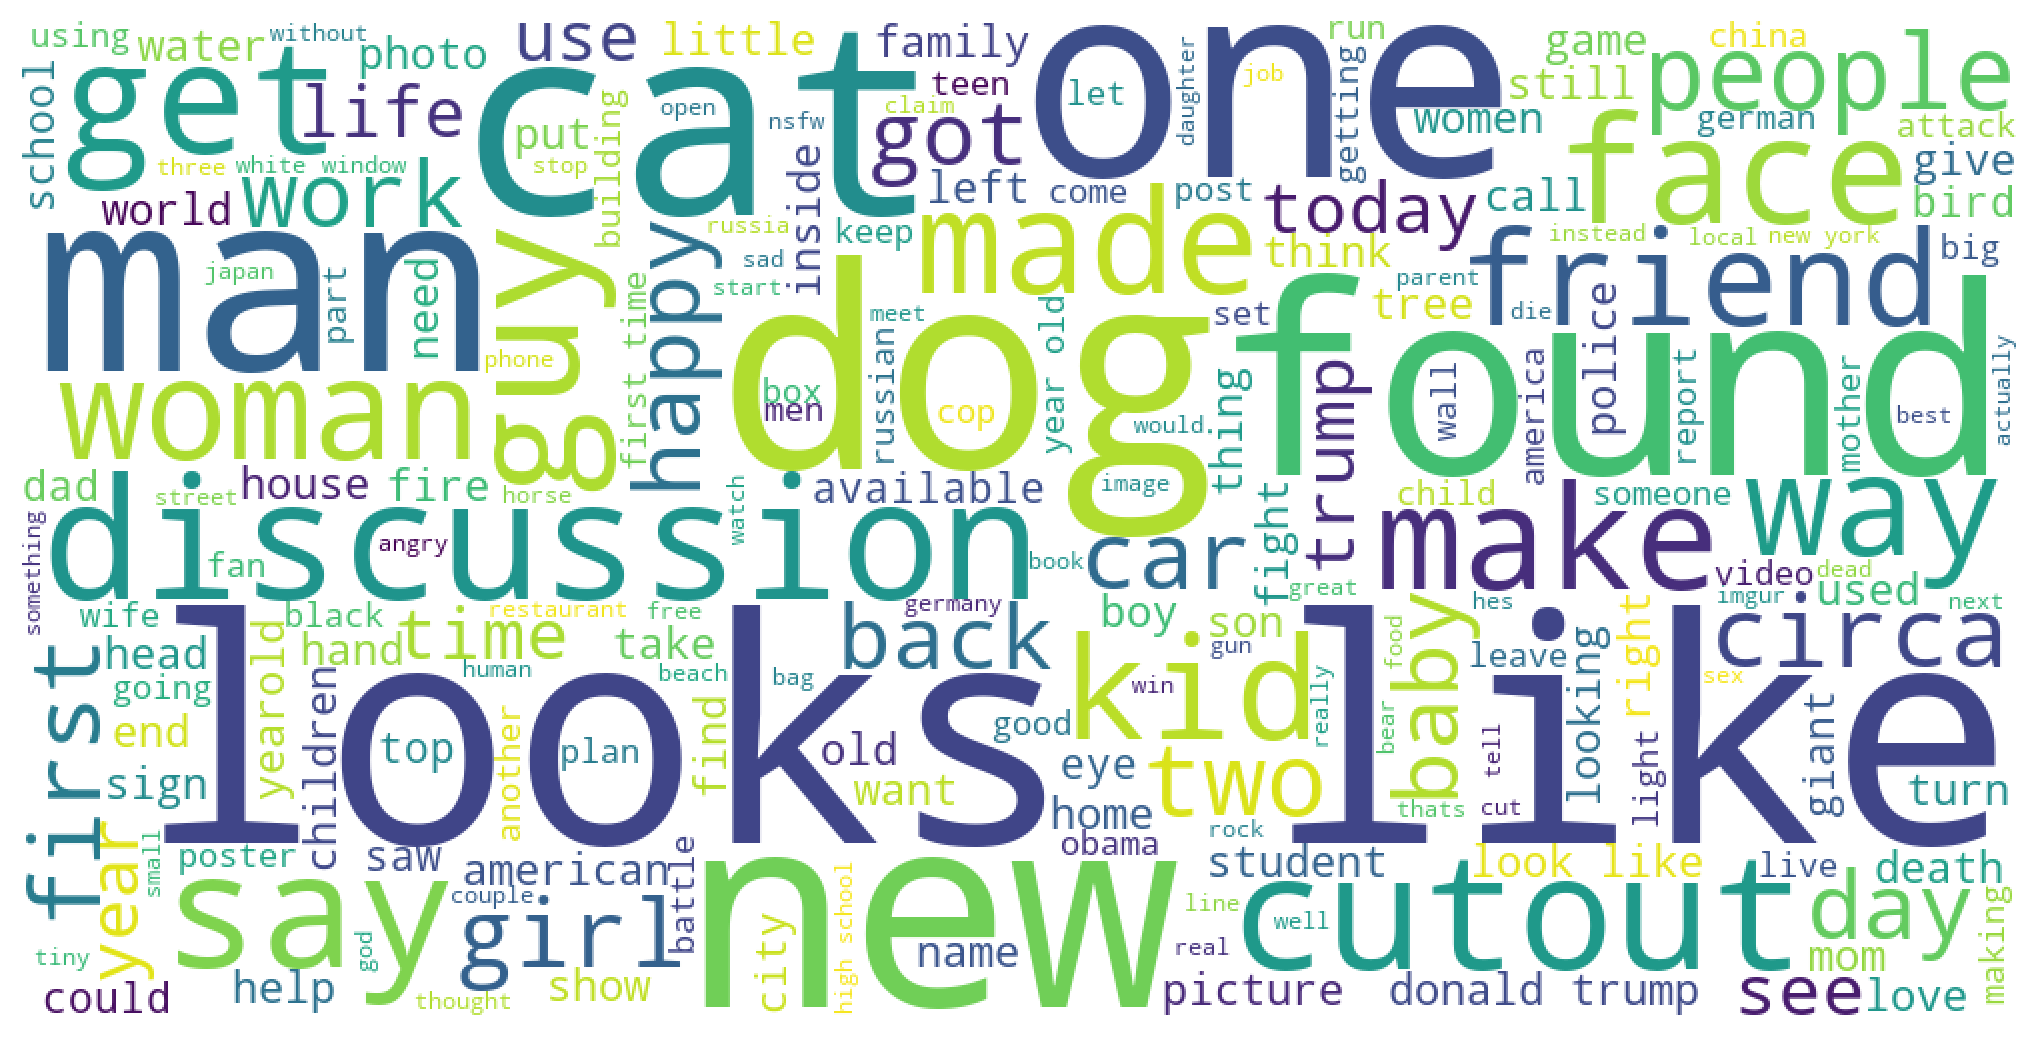



Analysis of attribute "title"


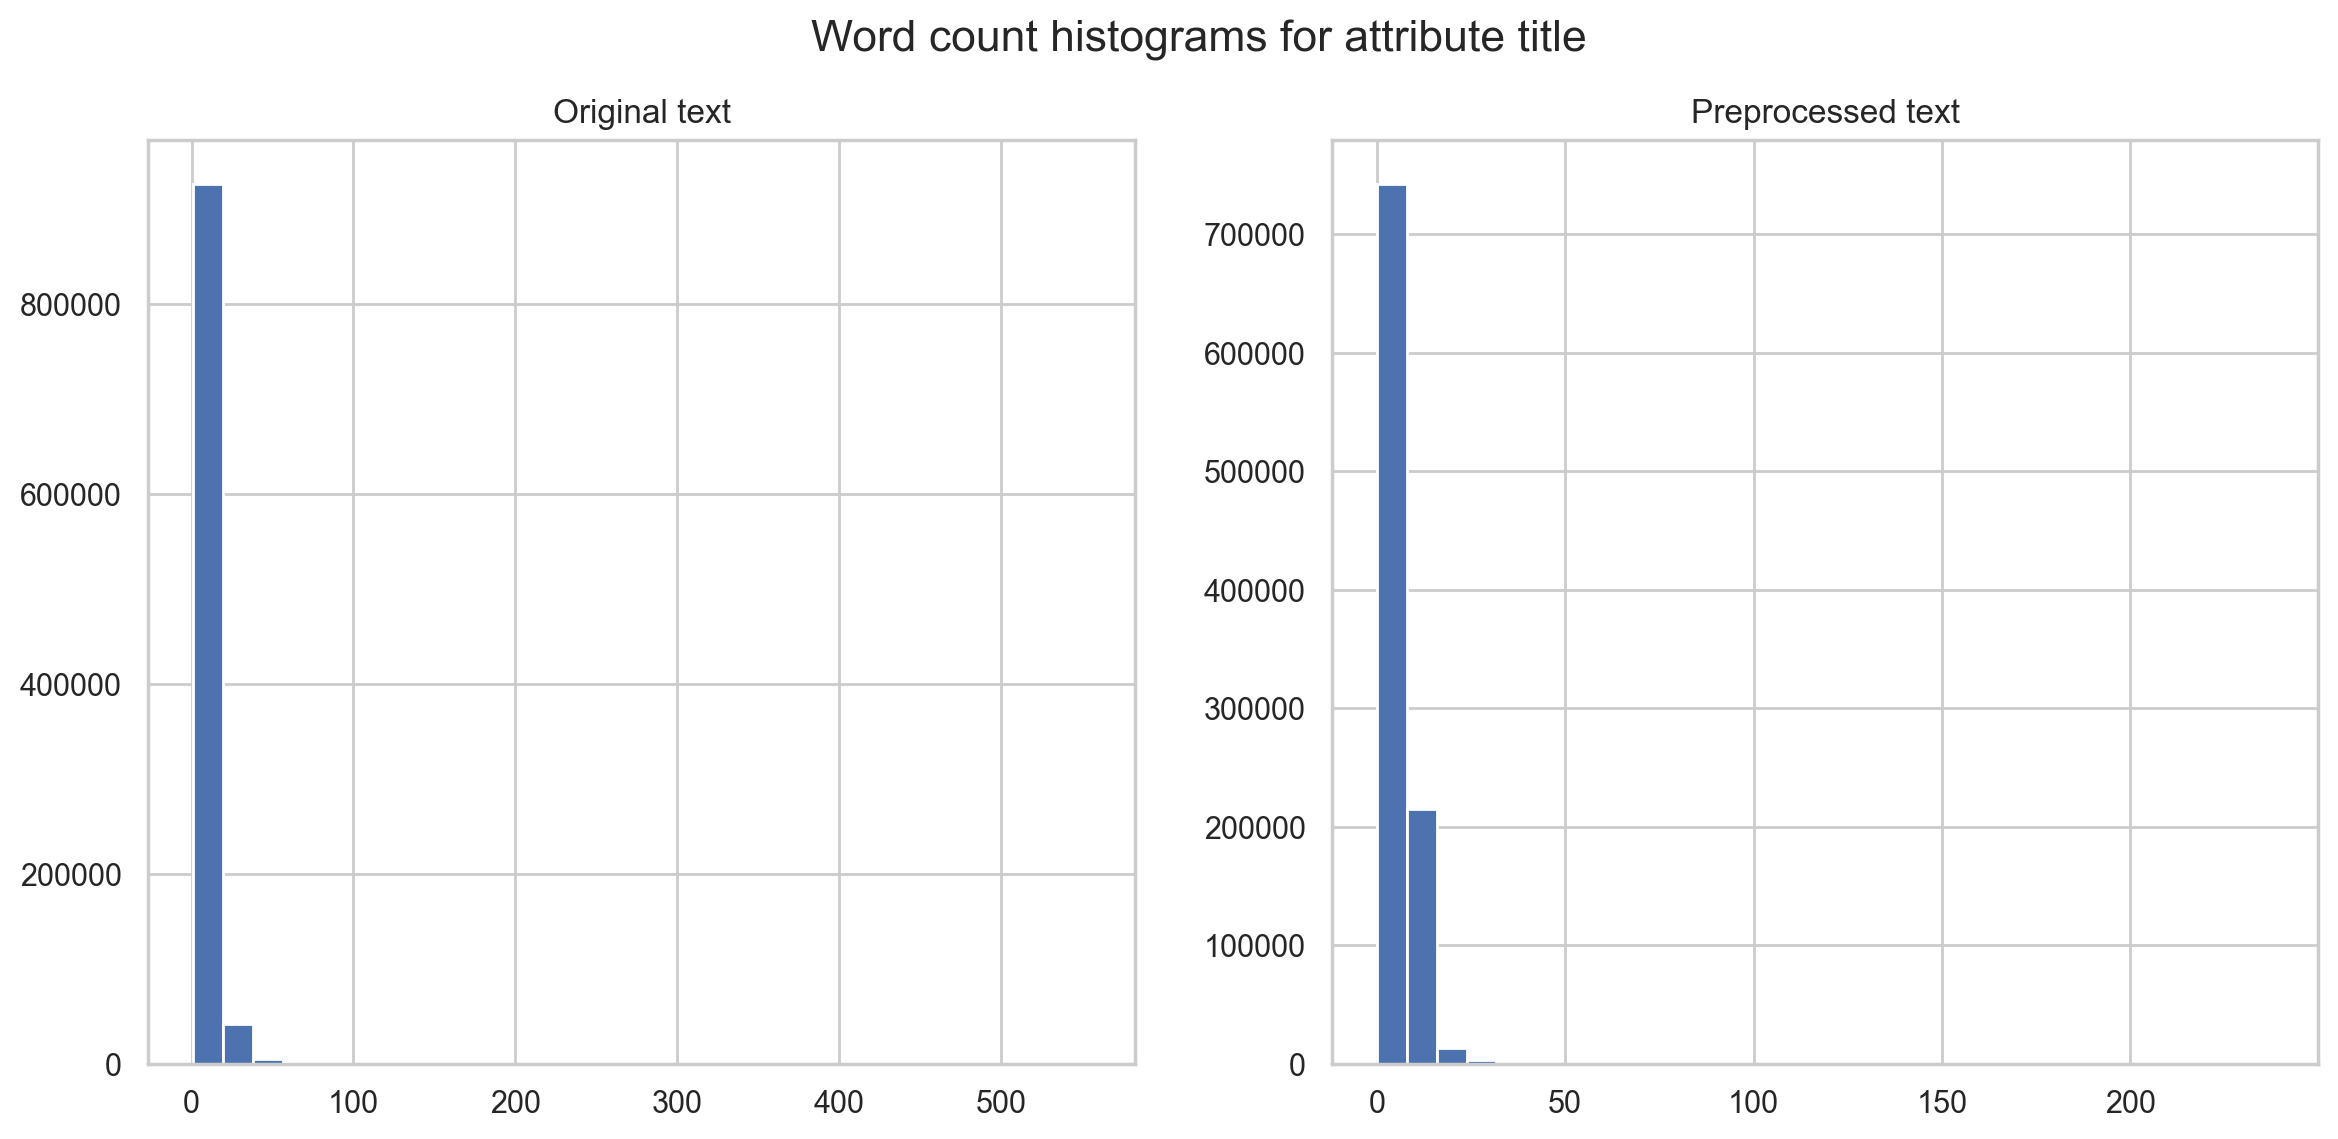

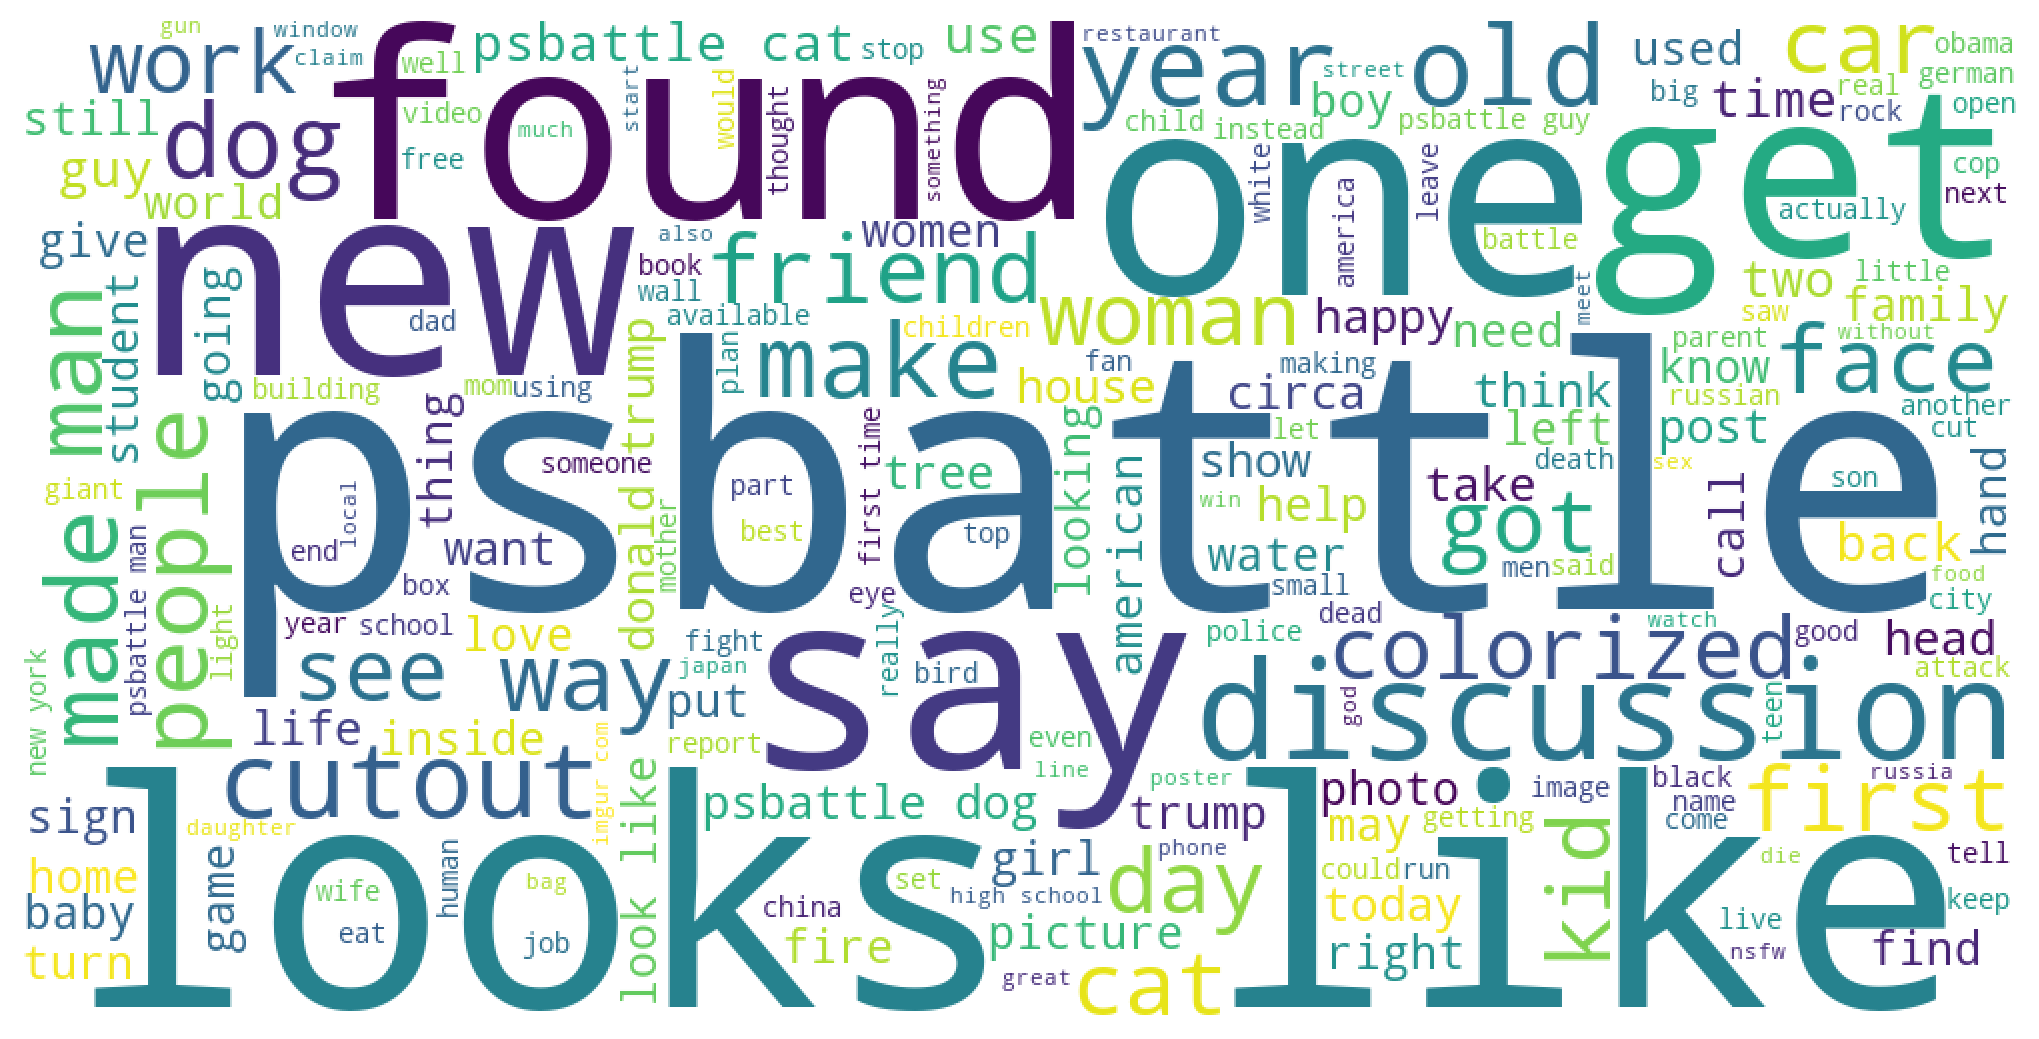

In [45]:
analyse_textual_attributes(df, textual_attributes)

## Pairwise analysis

Pairwise analysis of attributes (numerical attributes):

### Pair analysis

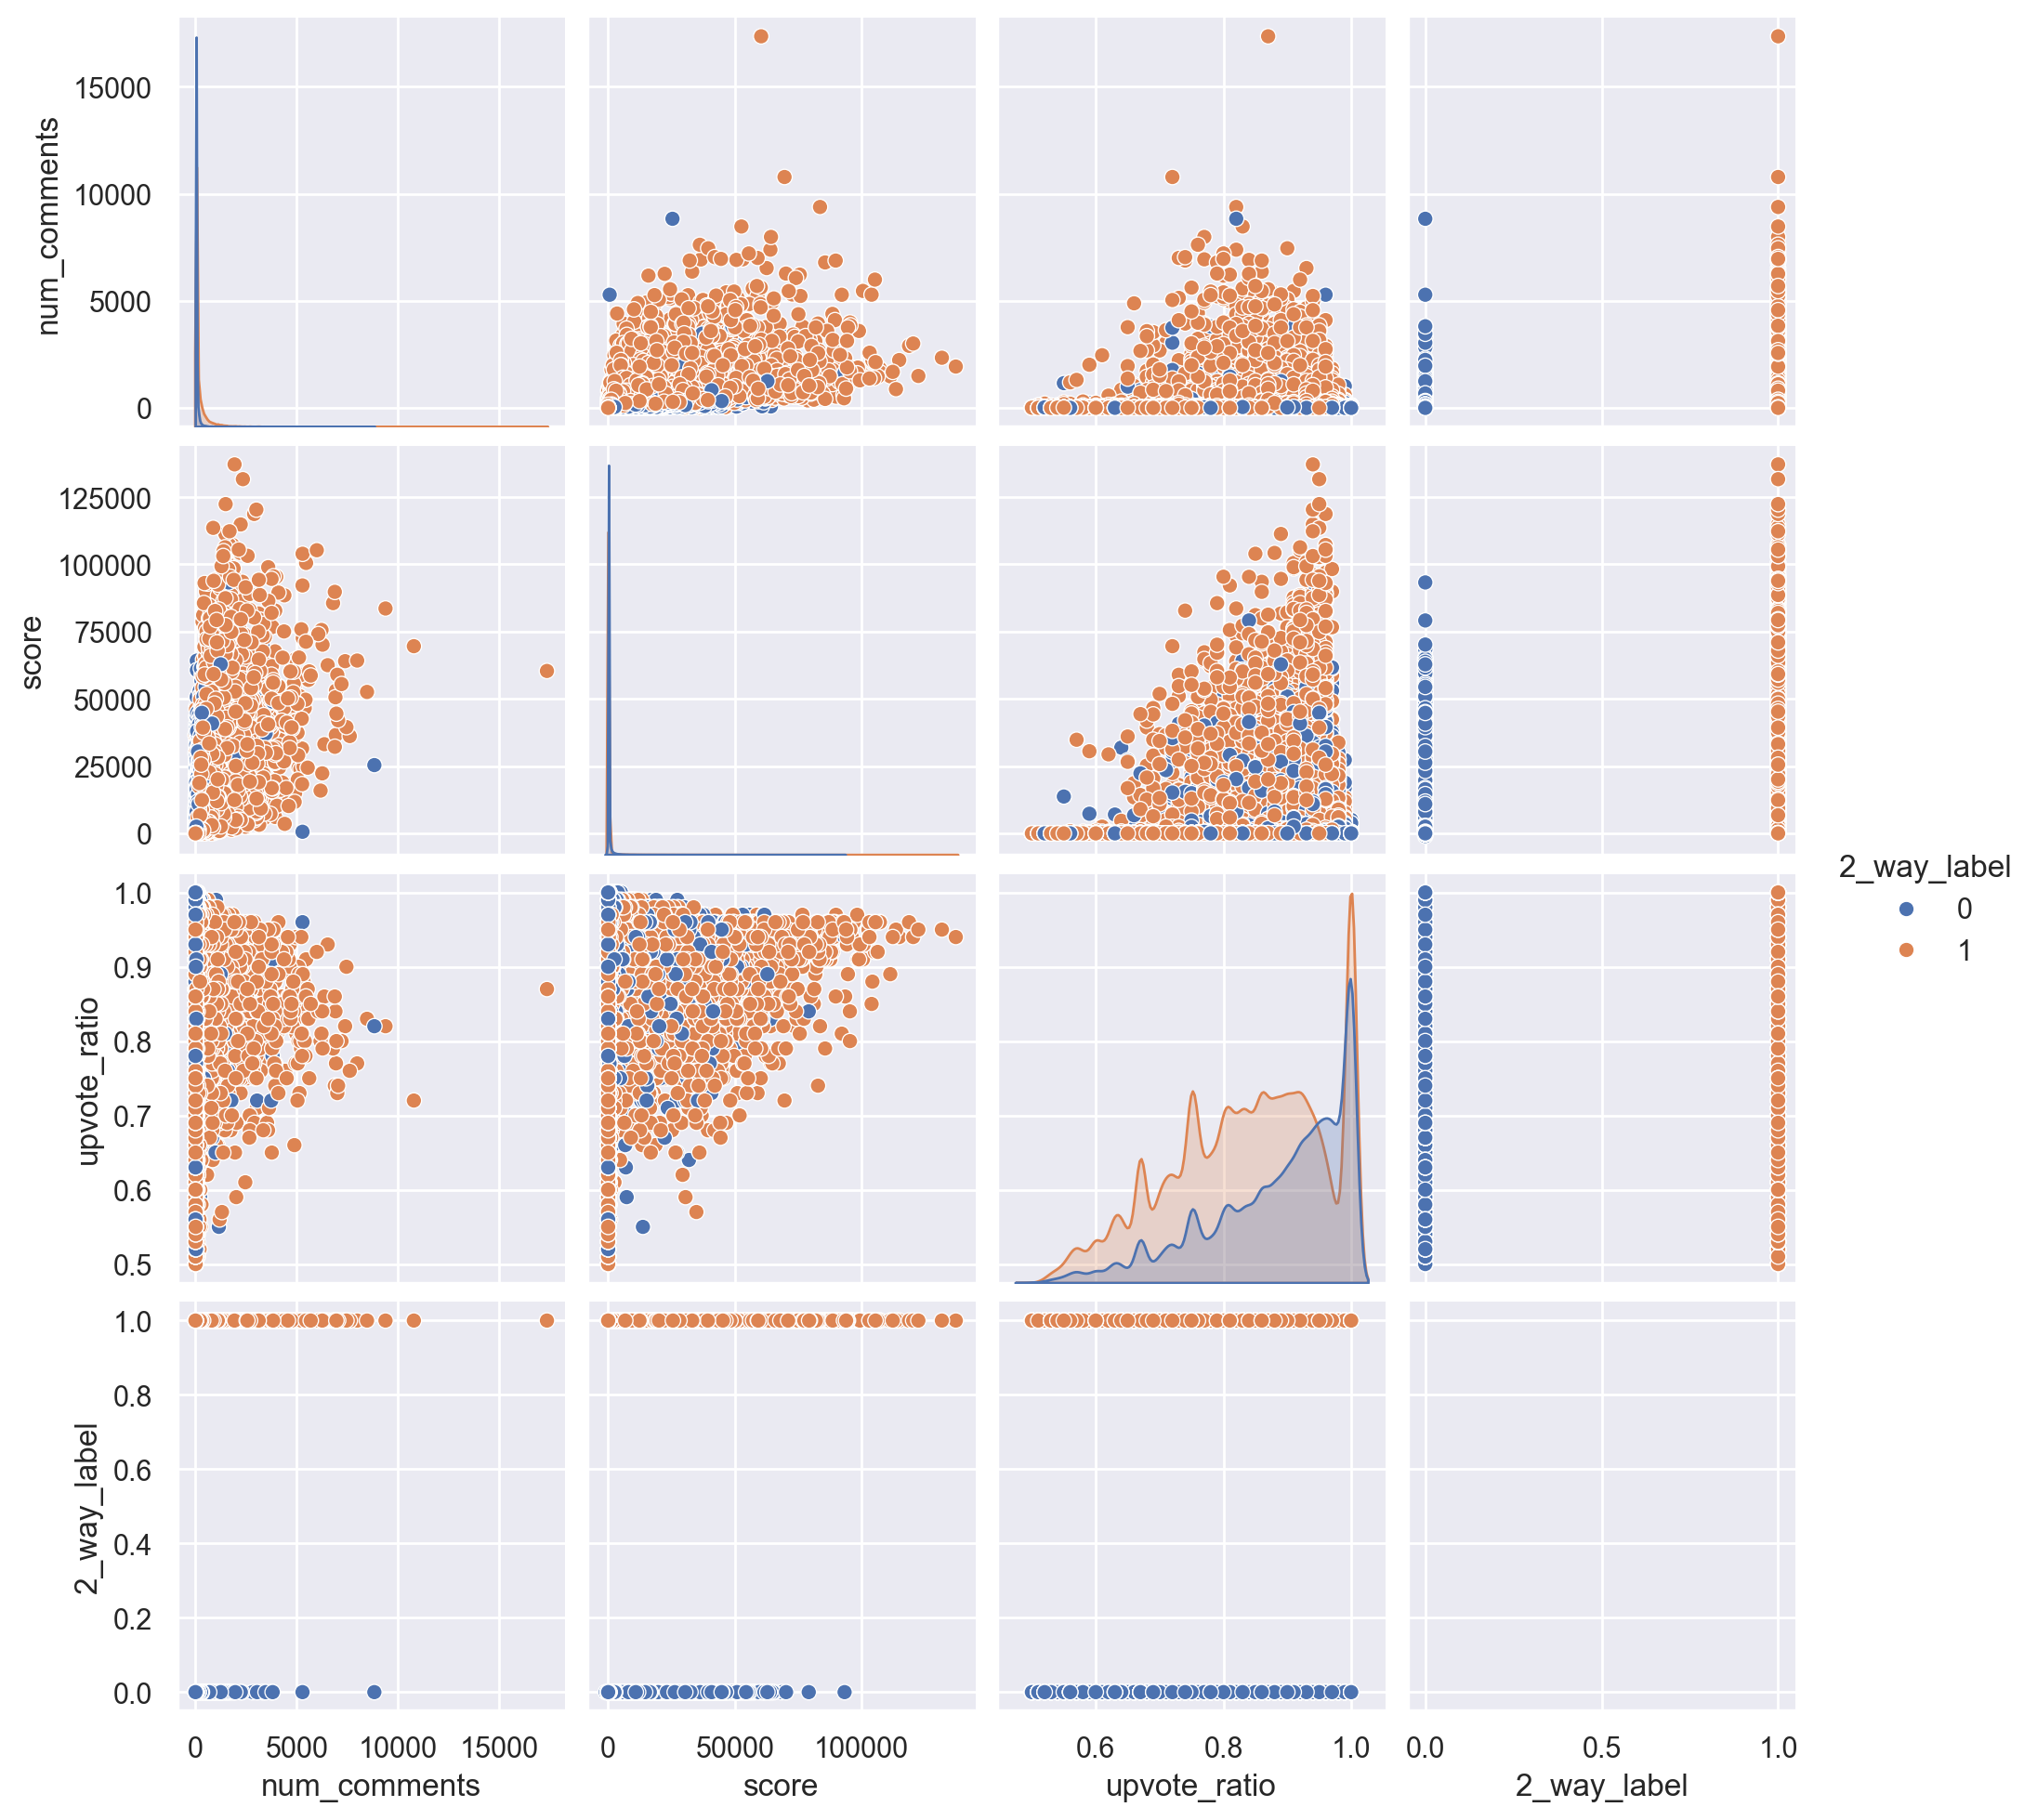

In [74]:
if numerical_attributes and len(numerical_attributes) > 1:
    sns.pairplot(df, vars=numerical_attributes, hue=label_column)

### Correlations

Correlation matrix:

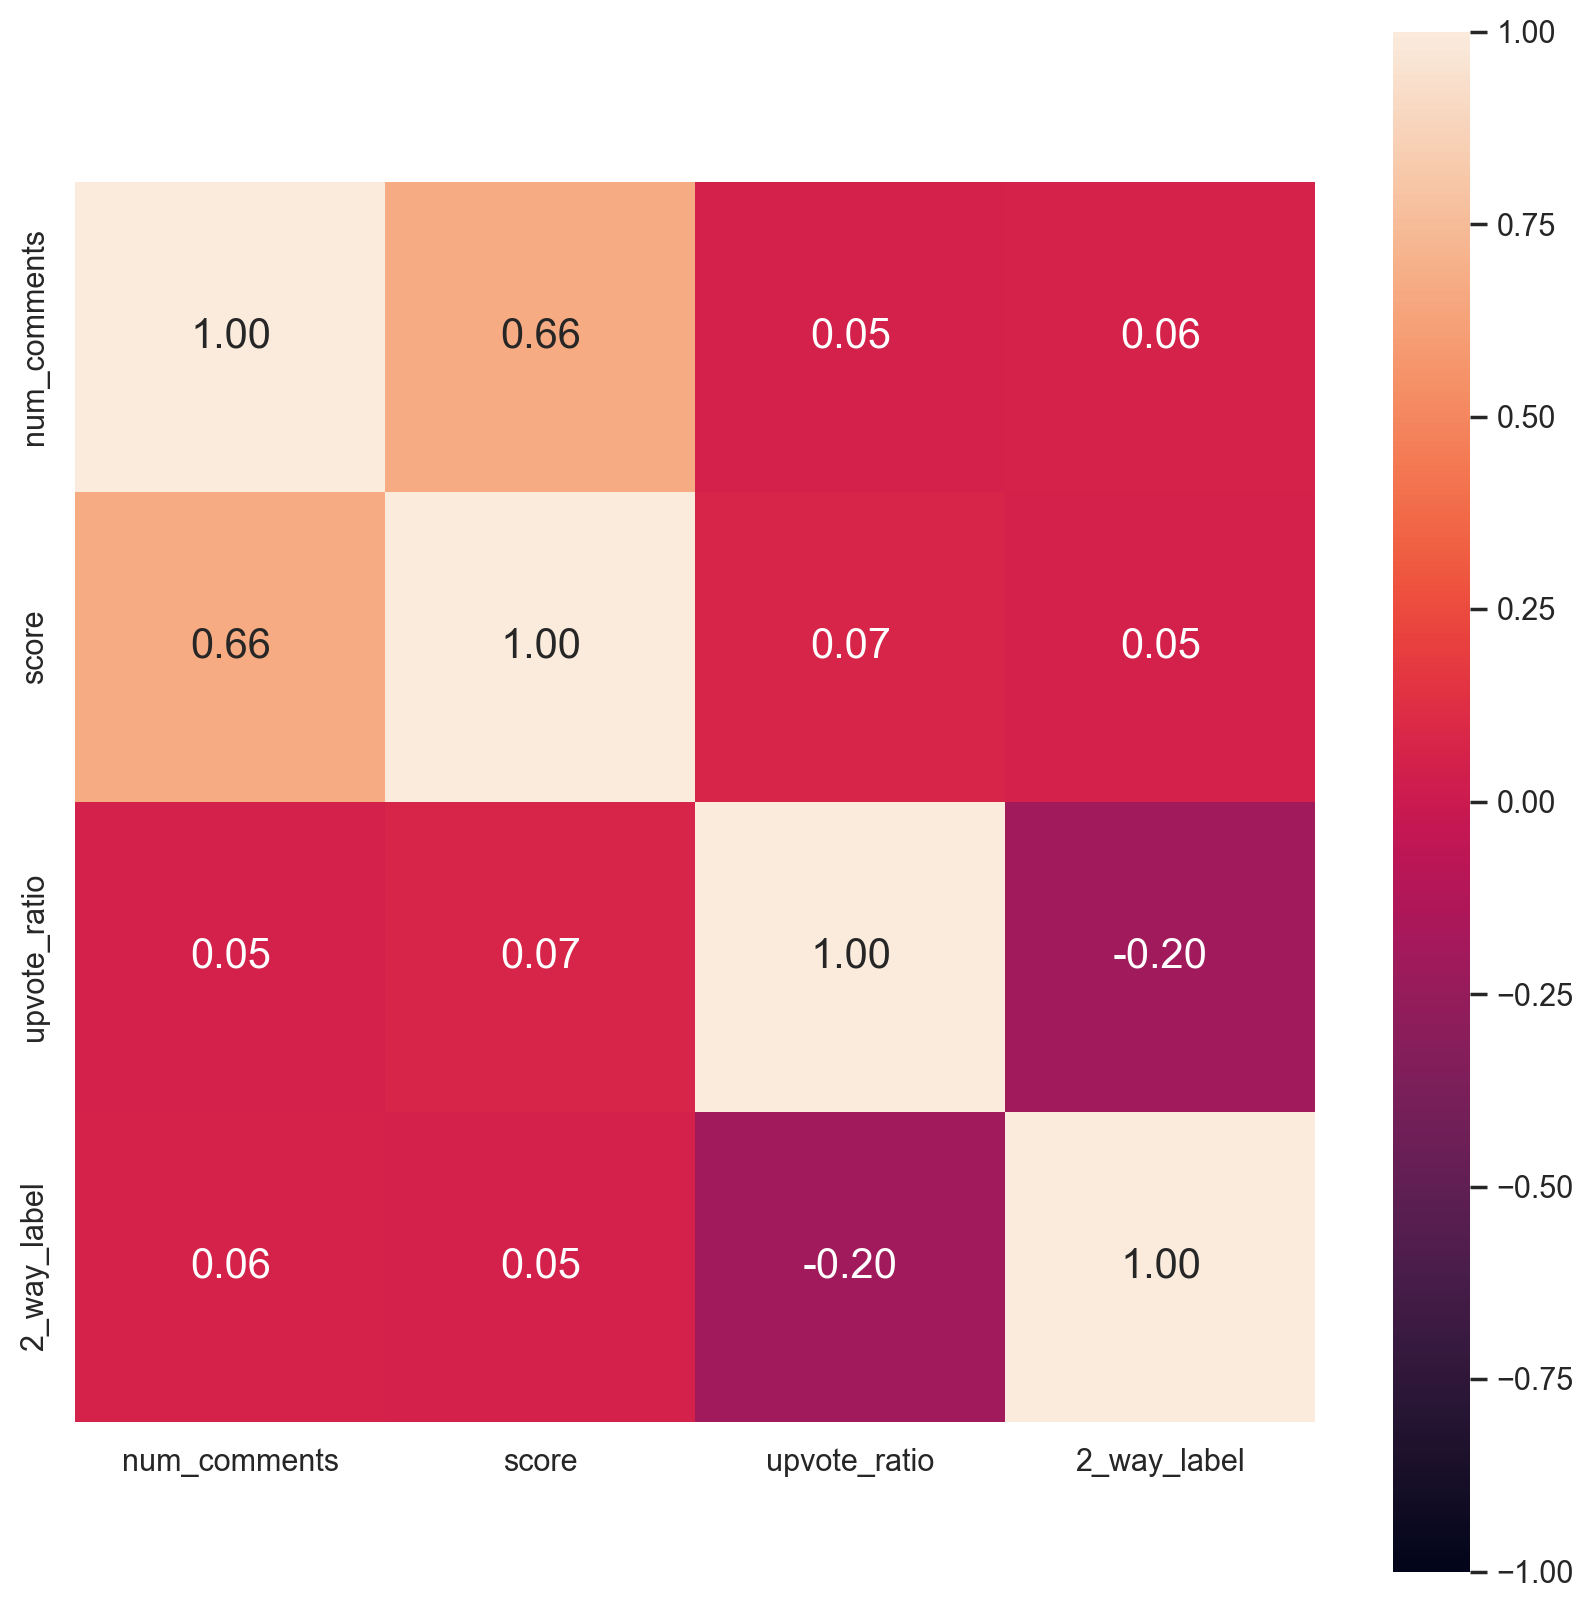

In [73]:
if numerical_attributes and len(numerical_attributes) > 1:
    check_correlations(df, numerical_attributes)

# Datasets (after processing)

In [28]:
# Will be stored in data/processed
DATA_PATH = "data/processed"
# Create the folder if it does not exist
os.makedirs(DATA_PATH, exist_ok=True)

for set in ["train", "validate", "test"]:
    SET_NAME = f"{set}"
    # Define the file path
    SET_PATH = os.path.join(DATA_PATH, f"{SET_NAME}_processed.tsv").replace("\\", "/")
    # Save the dataset
    if set == "train":
        df_train.to_csv(SET_PATH, index=False, sep="\t")
    elif set == "validate":
        df_validate.to_csv(SET_PATH, index=False, sep="\t")
    else:
        df_test.to_csv(SET_PATH, index=False, sep="\t")

    print(f"After processing, {set} dataset saved successfully to {os.getcwd()}/{SET_PATH}\n")

After processing, train dataset saved successfully to C:\Users\maciu\OneDrive - Universite de Montreal\Documents\1-UNIVERSITE DE MONTREAL\1-COURS\3- Hiver 2025\2- IFT6759 - Advanced Machine Learning Projects\4- Projects\Fake_news_detection/data/processed/train_processed.tsv

After processing, validate dataset saved successfully to C:\Users\maciu\OneDrive - Universite de Montreal\Documents\1-UNIVERSITE DE MONTREAL\1-COURS\3- Hiver 2025\2- IFT6759 - Advanced Machine Learning Projects\4- Projects\Fake_news_detection/data/processed/validate_processed.tsv

After processing, test dataset saved successfully to C:\Users\maciu\OneDrive - Universite de Montreal\Documents\1-UNIVERSITE DE MONTREAL\1-COURS\3- Hiver 2025\2- IFT6759 - Advanced Machine Learning Projects\4- Projects\Fake_news_detection/data/processed/test_processed.tsv

